# Loan Deafault - Demographics Analysis

Data Dictionary

#### 1.2.1 Demographic data (traindemographics.csv)
- customerid (Primary key used to merge to other data)
- birthdate (date of birth of the customer)
- bank_account_type (type of primary bank account)
- longitude_gps
- latitude_gps
- bank_name_clients (name of the bank)
- bank_branch_clients (location of the branch - not compulsory - so missing in a lot of the cases)
- employment_status_clients (type of employment that customer has)
- level_of_education_clients (highest level of education)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'Loan Default/demographics.csv')

In [3]:
df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [4]:
df.shape

(4346, 9)

In [5]:
df.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [6]:
df.dtypes

customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
dtype: object

- **Customerid** is a unique key, so its better to have it as an object
- **bithdate** is a date time parameter, to be converted to datetime object

In [7]:
print('Count after dropping the duplicates - ', df.drop_duplicates().shape[0]  , '\n')

# print(df.shape[0])

print('Totale shape of the data -', df.shape[0])

Count after dropping the duplicates -  4334 

Totale shape of the data - 4346


We can see there are duplicates in our data set, lets check and remove these

In [8]:
print('Total count of customerid -', df['customerid'].nunique())

print('Totale shape of the data -', df.shape[0])

Total count of customerid - 4334
Totale shape of the data - 4346


In [9]:
df['customerid'].value_counts().head(15)

8a858ec65cc6352b015cc64525ea0763    2
8a858f965bb63a25015bbf63fd062e2e    2
8a858fca5c35df2c015c39ad8695343e    2
8a858f1e5cc4bc81015cc548e1eb5206    2
8a858fc75cd62882015cdaf2f4311b3f    2
8a858f1e5baffcc9015bb02b505f180d    2
8a858fe65675195a015679452588279c    2
8a858e625c8d993a015c938f829f77ee    2
8a858edd57f790040157ffe9b6ed3fbb    2
8a858f9f5679951a01567a5b90644817    2
8a858e6c5c88d145015c8b9627cd5a48    2
8a858fe05d421ff4015d4c87d2a21ceb    2
8a858f23573921ad0157562d0d7015e4    1
8a858fbf5b3a0b46015b3a75f2633e33    1
8a858e5b5ca767e1015caa30f3125abc    1
Name: customerid, dtype: int64

In [10]:
df[df['customerid'] == '8a858fc75cd62882015cdaf2f4311b3f']

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
798,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27 00:00:00.000000,Savings,7.437607,9.088935,GT Bank,NaN,Permanent,NaN
1188,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27 00:00:00.000000,Savings,7.437607,9.088935,GT Bank,NaN,Permanent,NaN


In [11]:
df.drop_duplicates(inplace=True)

print('Shape of data after dropping the duplicates - ', df.shape)

Shape of data after dropping the duplicates -  (4334, 9)


In [12]:
df.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4283
employment_status_clients      648
level_of_education_clients    3748
dtype: int64

We can observe many missing values in **bank_branch_clients** and **Level_of_education**, we will analyse these individually. Even Employment status has some missing values

# Univariate Analysis

###### Customer ID

In [13]:
print('Total count of customerid -', df['customerid'].nunique())

print('Totale shape of the data -', df.shape[0])

Total count of customerid - 4334
Totale shape of the data - 4334


This is a unique string, so lets analyse the other variables

###### Birth date

In [14]:
df['birthdate'] = pd.to_datetime(df['birthdate'],format='%Y-%m-%d %H:%M:%S')  # COnverting to datetime object

###### Feature Engineered variables

In [15]:
df['birth_year'] = df['birthdate'].dt.year
df['birth_month'] = df['birthdate'].dt.month
df['birth_day'] = df['birthdate'].dt.day


# Extracting features from datetime object

In [16]:
now = pd.Timestamp('now')
df['birthdate'] = df['birthdate'].where(df['birthdate'] < now, df['birthdate'] -  np.timedelta64(100, 'Y'))   # 2
df['age_in_years'] = (now - df['birthdate']).astype('<m8[Y]')    # 3

# Extracting age from datetime

In [17]:
df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,1973,10,10,46.0
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,1986,1,21,34.0
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,4,1,33.0
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,1991,7,19,29.0
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,1982,11,22,37.0


Text(0, 0.5, 'Number of loans')

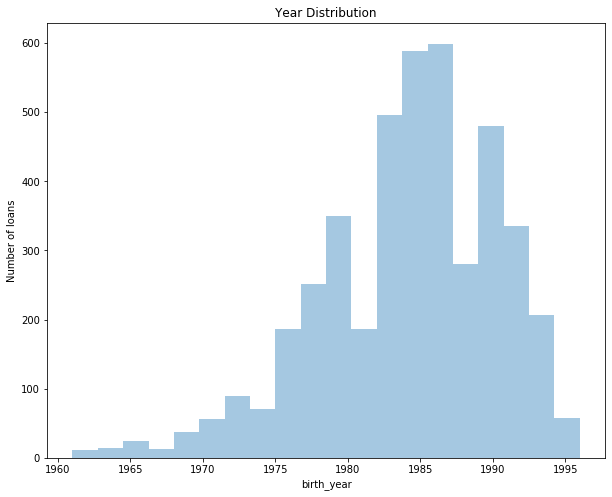

In [18]:
plt.figure(figsize=(10,8))

sns.distplot(df['birth_year'],bins=20,kde=False)

plt.title('Year Distribution')
plt.ylabel('Number of loans')

Huge spike is around 1985, implying that most of the loans where bought by people born during those years

In [19]:
df['birth_year'].value_counts().head(5)

1986    324
1984    300
1985    288
1988    280
1987    275
Name: birth_year, dtype: int64

Here again we can see that most of the loans are got by people born post 1985

Text(0.5, 1.0, 'Count of loans per month')

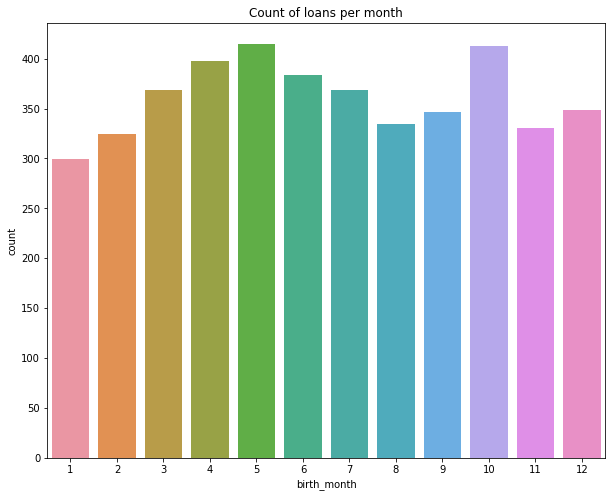

In [20]:
plt.figure(figsize=(10,8))

# df['birth_month'].value_counts().plot('bar')

sns.countplot(df['birth_month'])

plt.title('Count of loans per month')

Not much difference here, highest number of loans are got by people born on 5th month(May) and least by 1st month(January)

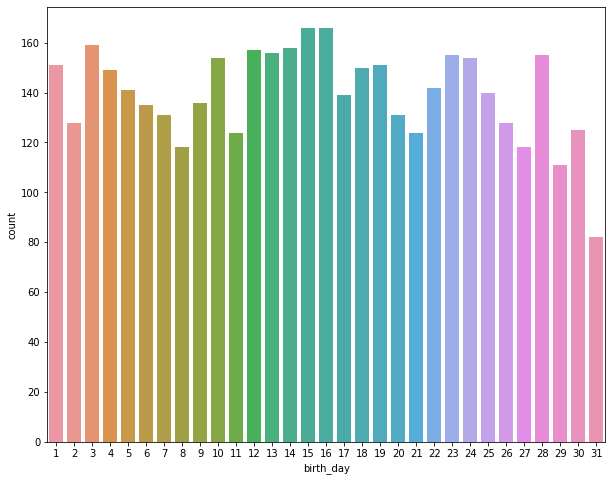

In [21]:
plt.figure(figsize=(10,8))

# df['birth_day'].value_counts().plot('bar')

sns.countplot(df['birth_day'])

No clear trend is seen here. Highest loans are from people born on 15th and 16th and least is on 31st

In [22]:
def cont_univ(x):
    sns.set(palette="Set1")
    plt.figure(figsize=(10,8))
    
    figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))


    
    sns.distplot(x,bins=25,kde=True,ax=ax[0])
    
#     sns.barplot(x,bins=25,ax=ax[2])
    
    # calculating descriptives of variable
    mini = x.min()
    maxi = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = x.median()
    st_dev = x.std()
    skew = x.skew()
    kurt = x.kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    sns.lineplot(points, [0,0], color = 'black', label = "std_dev",ax=ax[0])
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max",ax=ax[0])
    sns.scatterplot([mean], [0], color = 'red', label = "mean",ax=ax[0])
    sns.scatterplot([median], [0], color = 'blue', label = "median",ax=ax[0])
    
    ax[0].set_title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    
    sns.boxplot(x,ax=ax[1])
#     ax[1].set_title()

    
    plt.tight_layout()

<Figure size 720x576 with 0 Axes>

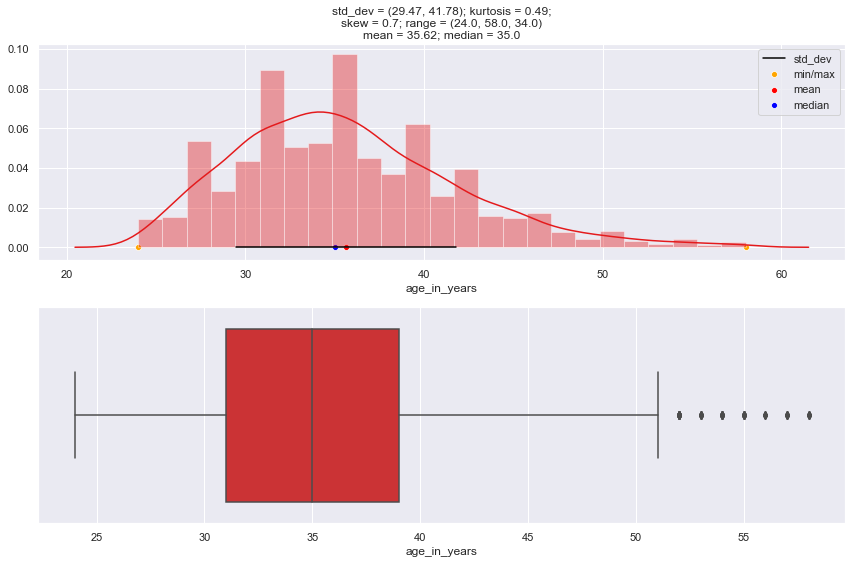

In [23]:
cont_univ(df['age_in_years'])

- Middle aged people in age range 30 - 40 are getting most of the loans
- There are few outliers shown and these are above 50 years

From the above analysis, we can see that most of the loans are got by people of age 30-40 so we can expect more loans to be personal loans

###### Bank account Type

In [24]:
df.dtypes

customerid                            object
birthdate                     datetime64[ns]
bank_account_type                     object
longitude_gps                        float64
latitude_gps                         float64
bank_name_clients                     object
bank_branch_clients                   object
employment_status_clients             object
level_of_education_clients            object
birth_year                             int64
birth_month                            int64
birth_day                              int64
age_in_years                         float64
dtype: object

In [25]:
df['bank_account_type'].value_counts()

Savings    3414
Other       864
Current      56
Name: bank_account_type, dtype: int64

In [26]:
df['bank_account_type'] = df['bank_account_type'].astype('category')

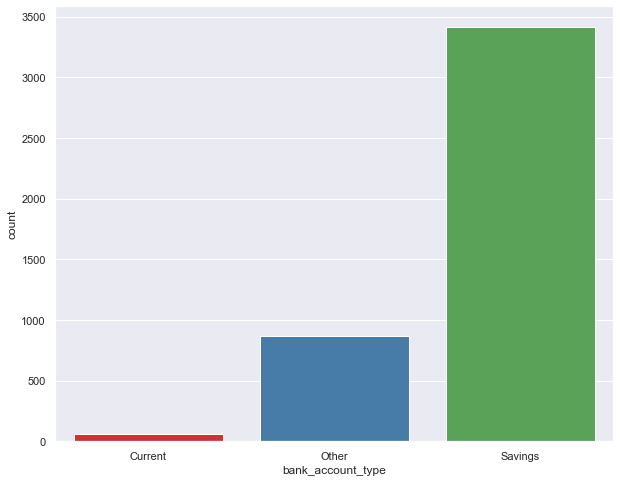

In [27]:
plt.figure(figsize=(10,8))

sns.countplot(df['bank_account_type'])

Most loans are recorded from Savings accounts

In [28]:
df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,1973,10,10,46.0
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,1986,1,21,34.0
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,4,1,33.0
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,1991,7,19,29.0
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,1982,11,22,37.0


In [29]:
df.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4283
employment_status_clients      648
level_of_education_clients    3748
birth_year                       0
birth_month                      0
birth_day                        0
age_in_years                     0
dtype: int64

In [30]:
df['bank_name_clients'].value_counts()

GT Bank               1594
First Bank             588
Access Bank            431
UBA                    351
Zenith Bank            301
Diamond Bank           282
EcoBank                150
Stanbic IBTC           144
FCMB                   121
Fidelity Bank          103
Skye Bank              101
Sterling Bank           54
Wema Bank               28
Union Bank              23
Heritage Bank           22
Keystone Bank           19
Standard Chartered      15
Unity Bank               7
Name: bank_name_clients, dtype: int64

- GT Bank has provided the most number of loans - might be the process of this bank is more easier
- Unity bank has provied the least number of loans

###### Bank branch clients

In [31]:
df['bank_branch_clients'].isnull().sum()/df.shape[0]

0.9882325796031379

Alomst 99% of this column are null values, our suggestion would be to drop this column as its doesn't contribute to our modelliing

###### Employment status clients

In [32]:
print('Null values', df['employment_status_clients'].isnull().sum(), '\n')

print('% of Null values', df['employment_status_clients'].isnull().sum()/df.shape[0])

Null values 648 

% of Null values 0.1495154591601292


In [33]:
df['employment_status_clients'].value_counts()

Permanent        3134
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

Retired and Contract values are too low, better we classify them as others for easier predicting

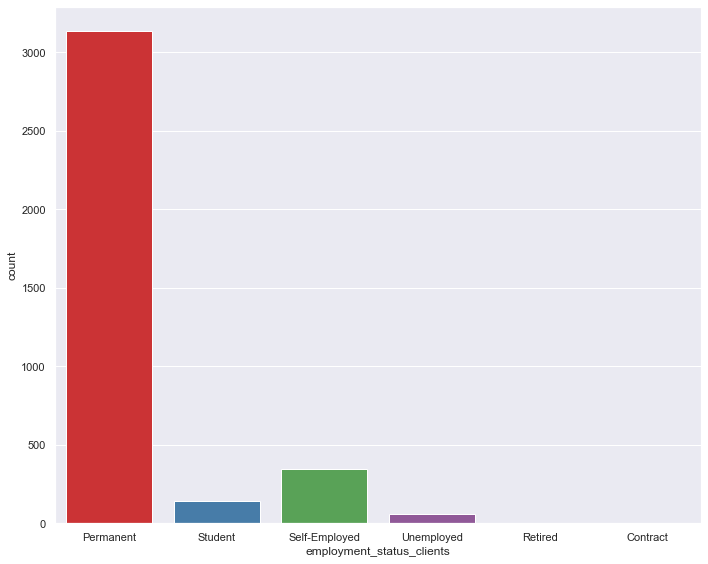

In [34]:
plt.figure(figsize=(10,8))

sns.countplot(df['employment_status_clients'])

plt.tight_layout()

- Permanent Employees have got more loans.
- Interestingly loans are also given to unemployed people, we will be further analysing if this percentage of people contribute to more defautler

###### Level of education clients

In [35]:
print('Null values', df['level_of_education_clients'].isnull().sum(), '\n')

print('% of Null values', df['level_of_education_clients'].isnull().sum()/df.shape[0])

Null values 3748 

% of Null values 0.8647900323027227


This column too has more number of missing values and its diffcult to impute them. So its better we drop this from our analysis

###### Latitude and Longitude Analysis

In [36]:
df['longitude_gps'].max()

151.20928999999998

In [37]:
df['latitude_gps'].min()

-33.868818299999994

In [38]:
# import folium
# from folium.plugins import HeatMap
# #maxpr = dataset.loc[dataset["trip_duration"].idxmax()]

# def generateBaseMap(default_location=[-33.868818299999994,151.20928999999998],default_zoom_start=10):
#     base_map = folium.Map(location=default_location,zoom_start=default_zoom_start,control_scale=True)
#     return base_map

# df_copy = df.copy()
# df_copy['count'] = 1
# basemap = generateBaseMap()

# # add carton position map
# folium.TileLayer('cartodbpositron').add_to(basemap)
# s=folium.FeatureGroup(name='icon').add_to(basemap)

# # add a marker for the house which has the highest price
# #folium.Marker([maxpr['pickup_latitude'], maxpr['pickup_longitude']],popup='Highest trip: $'+str(format(maxpr['trip_duration'],'.0f')),icon=folium.Icon(color='green')).add_to(s)

# # add heatmap
# HeatMap(data=df_copy[['latitude_gps','longitude_gps','count']], radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
# folium.LayerControl(collapsed=False).add_to(basemap)

# basemap

In [39]:
df['latitude_gps'].nunique()

4313

In [40]:
df['longitude_gps'].nunique()

4103

In [41]:
df.shape

(4334, 13)

In [42]:
df.dtypes

customerid                            object
birthdate                     datetime64[ns]
bank_account_type                   category
longitude_gps                        float64
latitude_gps                         float64
bank_name_clients                     object
bank_branch_clients                   object
employment_status_clients             object
level_of_education_clients            object
birth_year                             int64
birth_month                            int64
birth_day                              int64
age_in_years                         float64
dtype: object

In [43]:
df.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4283
employment_status_clients      648
level_of_education_clients    3748
birth_year                       0
birth_month                      0
birth_day                        0
age_in_years                     0
dtype: int64

# Combining demograhic and performace datasets

In [45]:
df2 = pd.read_csv(r'Loan Default/perf.csv')

In [46]:
df2.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [47]:
df2.shape[0]

4368

In [48]:
df2.drop_duplicates().shape[0]

4368

In [49]:
df2.dtypes

customerid        object
systemloanid       int64
loannumber         int64
approveddate      object
creationdate      object
loanamount       float64
totaldue         float64
termdays           int64
referredby        object
good_bad_flag     object
dtype: object

In [50]:
df2.isnull().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

In [51]:
df2['good_bad_flag'].value_counts()

Good    3416
Bad      952
Name: good_bad_flag, dtype: int64

In [52]:
demo = df.copy()

In [53]:
demo.shape[0]

4334

In [54]:
main_df = df2.merge(demo,on='customerid',how='left')

In [55]:
main_df.shape[0]

4368

In [56]:
main_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,...,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,1972.0,1.0,15.0,48.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,...,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,1985.0,8.0,23.0,35.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,...,11.139350,10.292041,EcoBank,NaN,Permanent,NaN,1984.0,9.0,18.0,35.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,...,3.985770,7.491708,First Bank,NaN,Permanent,NaN,1977.0,10.0,10.0,42.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,...,7.457913,9.076574,GT Bank,NaN,Permanent,Primary,1986.0,9.0,7.0,34.0


In [57]:
main_df.dtypes

customerid                            object
systemloanid                           int64
loannumber                             int64
approveddate                          object
creationdate                          object
loanamount                           float64
totaldue                             float64
termdays                               int64
referredby                            object
good_bad_flag                         object
birthdate                     datetime64[ns]
bank_account_type                   category
longitude_gps                        float64
latitude_gps                         float64
bank_name_clients                     object
bank_branch_clients                   object
employment_status_clients             object
level_of_education_clients            object
birth_year                           float64
birth_month                          float64
birth_day                            float64
age_in_years                         float64
dtype: obj

In [58]:
main_df[['bank_account_type','bank_name_clients',
        'employment_status_clients','level_of_education_clients']] = main_df[['bank_account_type',
                                                                            'bank_name_clients',
                                                                            'employment_status_clients',
                                                                            'level_of_education_clients']].astype('category')

In [59]:
main_df.dtypes

customerid                            object
systemloanid                           int64
loannumber                             int64
approveddate                          object
creationdate                          object
loanamount                           float64
totaldue                             float64
termdays                               int64
referredby                            object
good_bad_flag                         object
birthdate                     datetime64[ns]
bank_account_type                   category
longitude_gps                        float64
latitude_gps                         float64
bank_name_clients                   category
bank_branch_clients                   object
employment_status_clients           category
level_of_education_clients          category
birth_year                           float64
birth_month                          float64
birth_day                            float64
age_in_years                         float64
dtype: obj

In [60]:
main_df.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3781
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4335
employment_status_clients     1592
level_of_education_clients    3925
birth_year                    1099
birth_month                   1099
birth_day                     1099
age_in_years                  1099
dtype: int64

# Univariate Analysis

###### customerid & systemloanid

In [61]:
print('Total count of customerid -', main_df['customerid'].nunique())

print('Totale shape of the data -', main_df.shape[0])

Total count of customerid - 4368
Totale shape of the data - 4368


In [62]:
print('Total count of customerid -', main_df['systemloanid'].nunique())

print('Totale shape of the data -', main_df.shape[0])

Total count of customerid - 4368
Totale shape of the data - 4368


These 2 are unique ID's so no further analysis needed here

In [63]:
main_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,...,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,1972.0,1.0,15.0,48.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,...,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,1985.0,8.0,23.0,35.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,...,11.139350,10.292041,EcoBank,NaN,Permanent,NaN,1984.0,9.0,18.0,35.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,...,3.985770,7.491708,First Bank,NaN,Permanent,NaN,1977.0,10.0,10.0,42.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,...,7.457913,9.076574,GT Bank,NaN,Permanent,Primary,1986.0,9.0,7.0,34.0


In [64]:
main_df['loannumber'].value_counts()

2     1393
3      670
4      443
5      326
7      252
6      247
8      220
10     191
9      180
11     113
12     109
13      78
14      50
15      42
16      20
17      15
19       6
22       5
18       3
20       2
21       1
23       1
27       1
Name: loannumber, dtype: int64

Most number of people are taking their second loan. 
- **Interesting facts** 
- There are people who have taken 27 loans too

In [65]:
main_df['approveddate'] = pd.to_datetime(main_df['approveddate'])
main_df['creationdate'] = pd.to_datetime(main_df['creationdate'])

# Loanamount

<Figure size 720x576 with 0 Axes>

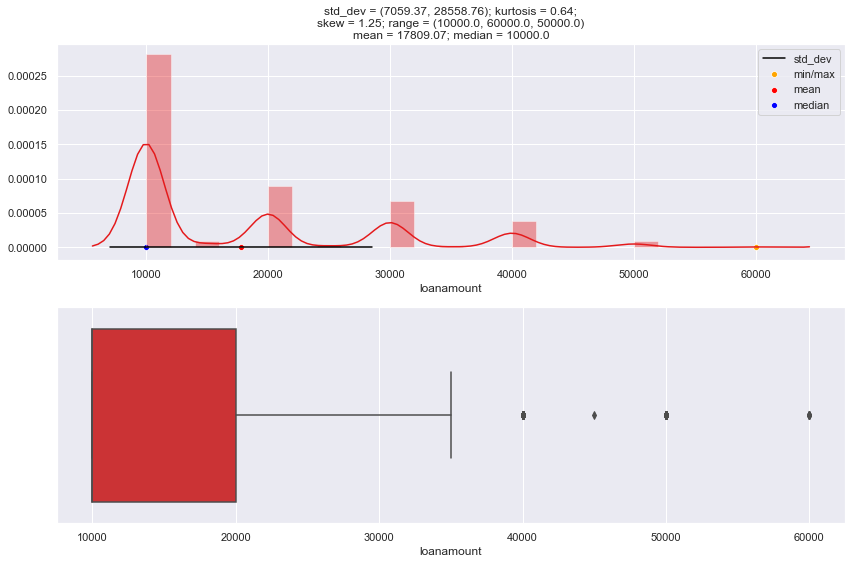

In [66]:
cont_univ(main_df['loanamount'])

In [67]:
main_df['loanamount'].value_counts()

10000.0    2462
20000.0     780
30000.0     584
40000.0     333
15000.0      82
50000.0      77
25000.0      31
35000.0      10
60000.0       8
45000.0       1
Name: loanamount, dtype: int64

56 % of the loans are for loan amount of 10,000.
- also we can see that all the loan amounts are taken in a multiples of 5

# Totaldue

<Figure size 720x576 with 0 Axes>

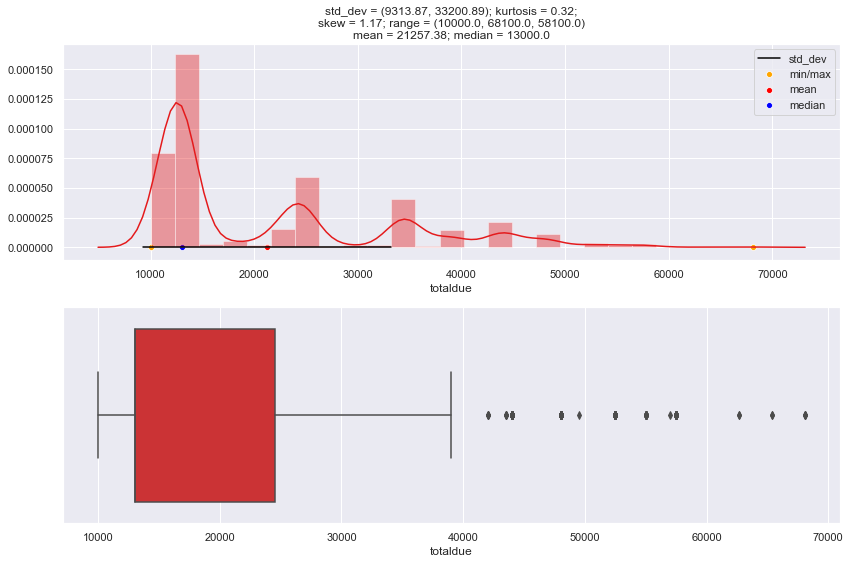

In [68]:
cont_univ(main_df['totaldue'])

<Figure size 720x576 with 0 Axes>

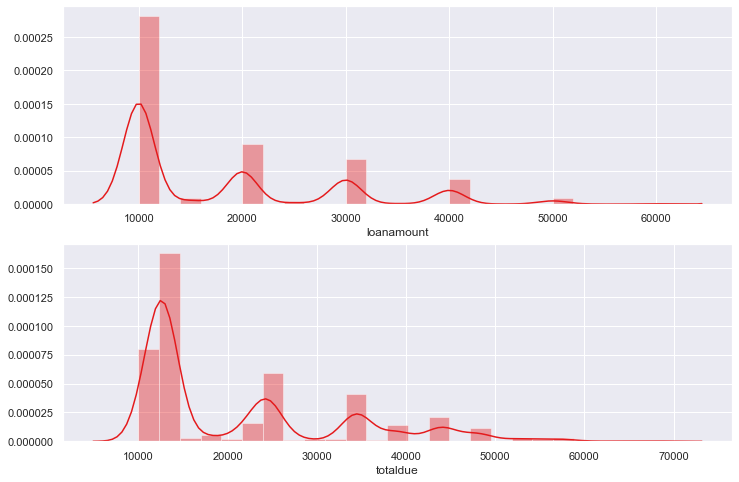

In [69]:
plt.figure(figsize=(10,8))
    
figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))

sns.distplot(main_df['totaldue'],bins=25,ax=ax[1])

sns.distplot(main_df['loanamount'],bins=25,ax=ax[0])

Since most of the loans are around 10k, we can expect the loan due too to be around 15k to 20k with all the interests

In [70]:
 main_df['totaldue'].value_counts()

13000.0    1640
11500.0     713
24500.0     595
34500.0     410
44000.0     212
39000.0     136
22250.0     119
48000.0     116
18375.0      39
11125.0      35
12250.0      34
52500.0      33
57500.0      27
23000.0      24
33000.0      19
16687.5      18
28750.0      18
55000.0      16
17250.0      14
12500.0      14
27500.0      13
22000.0      12
10750.0      12
11000.0      11
36000.0      10
21500.0       9
21000.0       8
24000.0       8
38500.0       7
16500.0       5
42000.0       4
68100.0       4
33999.9       4
16125.0       4
43500.0       4
38500.2       3
21750.0       3
31500.0       2
15750.0       2
62700.0       2
20500.0       2
65400.0       2
10250.0       1
10000.0       1
49500.0       1
57000.5       1
10500.0       1
Name: totaldue, dtype: int64

In [71]:
main_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,...,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,1972.0,1.0,15.0,48.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,...,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,1985.0,8.0,23.0,35.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,...,11.139350,10.292041,EcoBank,NaN,Permanent,NaN,1984.0,9.0,18.0,35.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,...,3.985770,7.491708,First Bank,NaN,Permanent,NaN,1977.0,10.0,10.0,42.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,...,7.457913,9.076574,GT Bank,NaN,Permanent,Primary,1986.0,9.0,7.0,34.0


In [72]:
main_df['termdays'].value_counts()

30    3129
15     919
60     288
90      32
Name: termdays, dtype: int64

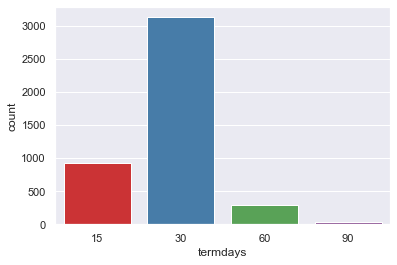

In [73]:
sns.countplot(main_df['termdays'])

- Most of the term days are 30 days and 90 days is very less.

- We want to check term vs loanamount.

###### Referredby

In [74]:
main_df['referredby'].isnull().sum()/main_df.shape[0]

0.8656135531135531

- 86% of the time the loans are not referred by anyone. very less number of referrals.
- we can engineer a feature isreferred later on.

To check for co-relation between isreferred and target variables.

#### Feature Engineering

In [75]:
main_df['referredby'].value_counts()

8a858fc55b2548dd015b286e452c678c    8
8a858e125b391784015b395fa56243e6    3
8a858eeb5bb559d3015bb57fa13f10de    3
8a858f965bb63a25015bc2ddf2577416    3
8a858f295ca6f581015ca77afccb5d6d    2
                                   ..
8a858eed5a42df95015a45e2fcac6aa9    1
8a858f695b5cbd3a015b5cd5ff29188a    1
8a858f765a4e7c76015a5086a54e39cf    1
8a858eba5c884d2a015c8d20c864739e    1
8a858fce5bf8129c015bfbcdde9467f6    1
Name: referredby, Length: 521, dtype: int64

In [76]:
main_df['isreferred'] = main_df['referredby'].apply(lambda x:1 if pd.isnull(x) else 0)

In [77]:
main_df['isreferred'].isnull().sum()

0

In [78]:
main_df['isreferred'].value_counts()

1    3781
0     587
Name: isreferred, dtype: int64

###### Good and bad flag

In [79]:
main_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years,isreferred
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,...,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,1972.0,1.0,15.0,48.0,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,...,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,1985.0,8.0,23.0,35.0,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,...,10.292041,EcoBank,NaN,Permanent,NaN,1984.0,9.0,18.0,35.0,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,...,7.491708,First Bank,NaN,Permanent,NaN,1977.0,10.0,10.0,42.0,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,...,9.076574,GT Bank,NaN,Permanent,Primary,1986.0,9.0,7.0,34.0,1


In [80]:
main_df['good_bad_flag'].value_counts(normalize=True)

Good    0.782051
Bad     0.217949
Name: good_bad_flag, dtype: float64

About 78 percent of people in our dataset have paid the loans on time.

###### Bank account type

In [81]:
main_df['bank_account_type'].isnull().sum()

1099

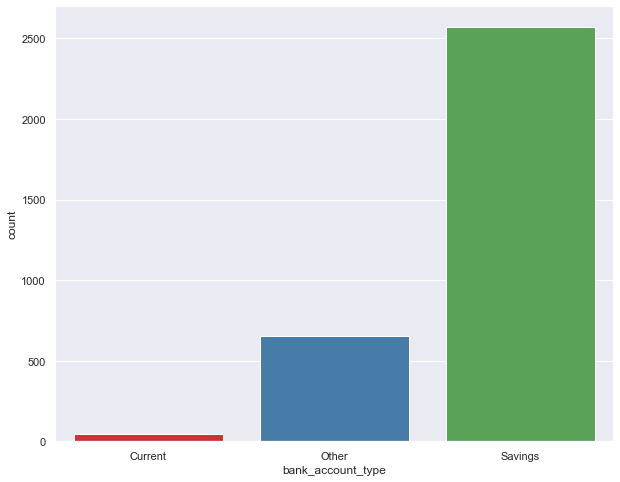

In [82]:
plt.figure(figsize=(10,8))

sns.countplot(main_df['bank_account_type'])

In [83]:
main_df['bank_account_type'].value_counts()

Savings    2570
Other       653
Current      46
Name: bank_account_type, dtype: int64

- Saving is the most preffered account for loans,current account is the least.
- There are a few null values too

In [84]:
main_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years,isreferred
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,...,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,1972.0,1.0,15.0,48.0,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,...,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,1985.0,8.0,23.0,35.0,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,...,10.292041,EcoBank,NaN,Permanent,NaN,1984.0,9.0,18.0,35.0,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,...,7.491708,First Bank,NaN,Permanent,NaN,1977.0,10.0,10.0,42.0,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,...,9.076574,GT Bank,NaN,Permanent,Primary,1986.0,9.0,7.0,34.0,1


In [85]:
main_df['bank_name_clients'].isnull().sum()

1099

In [86]:
main_df['bank_name_clients'].value_counts()

GT Bank               1207
First Bank             430
Access Bank            328
UBA                    267
Zenith Bank            224
Diamond Bank           216
Stanbic IBTC           117
EcoBank                116
FCMB                    89
Skye Bank               75
Fidelity Bank           74
Sterling Bank           42
Wema Bank               19
Heritage Bank           18
Union Bank              15
Keystone Bank           14
Standard Chartered      13
Unity Bank               5
Name: bank_name_clients, dtype: int64

- GT Bank is the most preferred bank, and has a few null values

In [87]:
main_df['employment_status_clients'].isnull().sum()

1592

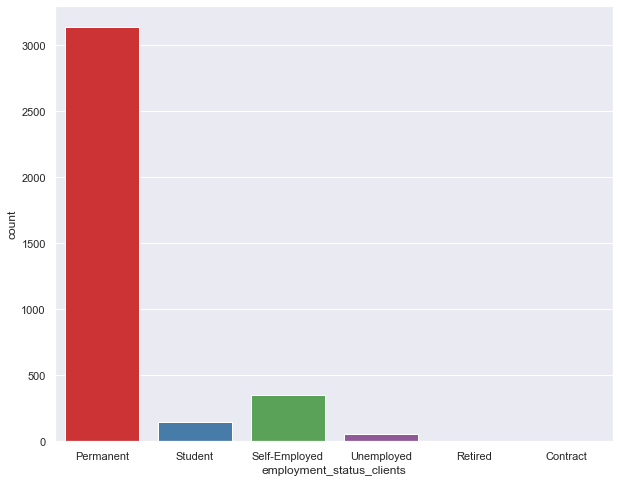

In [88]:
plt.figure(figsize=(10,8))

sns.countplot(df['employment_status_clients'])

- Most of the people getting loans are permanent employees
- Even unemployed people get loans

###### Level of education

In [89]:
main_df['level_of_education_clients'].value_counts()

Graduate         321
Secondary         65
Post-Graduate     50
Primary            7
Name: level_of_education_clients, dtype: int64

In [90]:
main_df['level_of_education_clients'].isnull().sum()/main_df.shape[0]

0.8985805860805861

almost 90% of this column values are missing, this will not be optimal for modelling.

In [91]:
main_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years,isreferred
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,...,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,1972.0,1.0,15.0,48.0,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,...,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,1985.0,8.0,23.0,35.0,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,...,10.292041,EcoBank,NaN,Permanent,NaN,1984.0,9.0,18.0,35.0,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,...,7.491708,First Bank,NaN,Permanent,NaN,1977.0,10.0,10.0,42.0,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,...,9.076574,GT Bank,NaN,Permanent,Primary,1986.0,9.0,7.0,34.0,1


<Figure size 720x576 with 0 Axes>

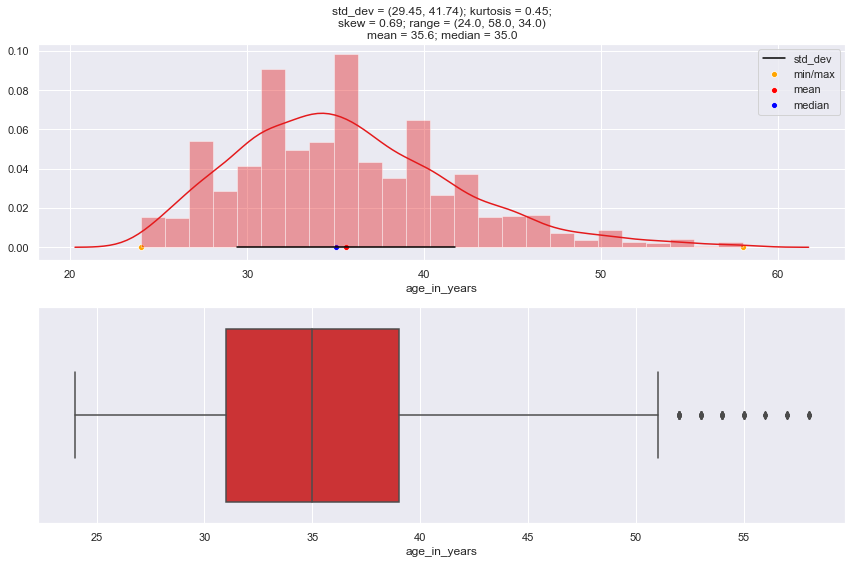

In [92]:
cont_univ(main_df['age_in_years'])

- Most of the people are around the 30 to 40 years.
- Can see a few outliers of above 50 years
- Does this mean more personal loans ? 

# Bivariate Analysis

###### Loannumber vs target

In [93]:
ratio = pd.crosstab(main_df['loannumber'],main_df['good_bad_flag']).reset_index()

In [94]:
ratio

good_bad_flag,loannumber,Bad,Good
0,2,347,1046
1,3,179,491
2,4,111,332
3,5,52,274
4,6,56,191
5,7,41,211
6,8,37,183
7,9,30,150
8,10,28,163
9,11,16,97


In [95]:
ratio['bad_ratio'] = round(ratio['Bad']/(ratio['Good'] + ratio['Bad'])*100)

In [96]:
ratio

good_bad_flag,loannumber,Bad,Good,bad_ratio
0,2,347,1046,25.0
1,3,179,491,27.0
2,4,111,332,25.0
3,5,52,274,16.0
4,6,56,191,23.0
5,7,41,211,16.0
6,8,37,183,17.0
7,9,30,150,17.0
8,10,28,163,15.0
9,11,16,97,14.0


Not much trend here, we can feature engineer some variables from prev records.

###### Loan amount and target

In [97]:
loan_ratio = pd.crosstab(main_df['loanamount'],main_df['good_bad_flag']).reset_index()
loan_ratio

good_bad_flag,loanamount,Bad,Good
0,10000.0,655,1807
1,15000.0,11,71
2,20000.0,127,653
3,25000.0,4,27
4,30000.0,96,488
5,35000.0,1,9
6,40000.0,46,287
7,45000.0,0,1
8,50000.0,11,66
9,60000.0,1,7


In [98]:
loan_ratio['bad_ratio'] = round(loan_ratio['Bad']/(loan_ratio['Good'] + loan_ratio['Bad'])*100)

In [99]:
loan_ratio

good_bad_flag,loanamount,Bad,Good,bad_ratio
0,10000.0,655,1807,27.0
1,15000.0,11,71,13.0
2,20000.0,127,653,16.0
3,25000.0,4,27,13.0
4,30000.0,96,488,16.0
5,35000.0,1,9,10.0
6,40000.0,46,287,14.0
7,45000.0,0,1,0.0
8,50000.0,11,66,14.0
9,60000.0,1,7,12.0


###### Total Due vs target

In [100]:
loan_ratio = pd.crosstab(main_df['totaldue'],main_df['good_bad_flag']).reset_index()
loan_ratio

good_bad_flag,totaldue,Bad,Good
0,10000.0,0,1
1,10250.0,0,1
2,10500.0,0,1
3,10750.0,0,12
4,11000.0,0,11
5,11125.0,2,33
6,11500.0,173,540
7,12250.0,2,32
8,12500.0,3,11
9,13000.0,475,1165


In [101]:
loan_ratio['bad_ratio'] = round(loan_ratio['Bad']/(loan_ratio['Good'] + loan_ratio['Bad'])*100)

In [102]:
loan_ratio[loan_ratio['bad_ratio'] > 20]

good_bad_flag,totaldue,Bad,Good,bad_ratio
6,11500.0,173,540,24.0
8,12500.0,3,11,21.0
9,13000.0,475,1165,29.0
15,18375.0,8,31,21.0
19,21750.0,1,2,33.0
21,22250.0,29,90,24.0
26,28750.0,4,14,22.0
34,39000.0,33,103,24.0
35,42000.0,1,3,25.0
36,43500.0,1,3,25.0


###### Term days vs target

In [103]:
loan_ratio = pd.crosstab(main_df['termdays'],main_df['good_bad_flag']).reset_index()
loan_ratio

good_bad_flag,termdays,Bad,Good
0,15,208,711
1,30,673,2456
2,60,65,223
3,90,6,26


In [104]:
loan_ratio['bad_ratio'] = round(loan_ratio['Bad']/(loan_ratio['Good'] + loan_ratio['Bad'])*100)
loan_ratio

good_bad_flag,termdays,Bad,Good,bad_ratio
0,15,208,711,23.0
1,30,673,2456,22.0
2,60,65,223,23.0
3,90,6,26,19.0


###### Referred and target

In [105]:
main_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years,isreferred
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,...,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,1972.0,1.0,15.0,48.0,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,...,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,1985.0,8.0,23.0,35.0,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,...,10.292041,EcoBank,NaN,Permanent,NaN,1984.0,9.0,18.0,35.0,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,...,7.491708,First Bank,NaN,Permanent,NaN,1977.0,10.0,10.0,42.0,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,...,9.076574,GT Bank,NaN,Permanent,Primary,1986.0,9.0,7.0,34.0,1


In [106]:
loan_ratio = pd.crosstab(main_df['isreferred'],main_df['good_bad_flag']).reset_index()

In [107]:
loan_ratio['bad_ratio'] = round(loan_ratio['Bad']/(loan_ratio['Good'] + loan_ratio['Bad'])*100)
loan_ratio

good_bad_flag,isreferred,Bad,Good,bad_ratio
0,0,134,453,23.0
1,1,818,2963,22.0


- Here we can see that there is nt much difference in ratio, but only 10% of the ppl were referred and in the 10% 20 percent are defaulter

In [108]:
main_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years,isreferred
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,...,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,1972.0,1.0,15.0,48.0,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,...,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,1985.0,8.0,23.0,35.0,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,...,10.292041,EcoBank,NaN,Permanent,NaN,1984.0,9.0,18.0,35.0,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,...,7.491708,First Bank,NaN,Permanent,NaN,1977.0,10.0,10.0,42.0,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,...,9.076574,GT Bank,NaN,Permanent,Primary,1986.0,9.0,7.0,34.0,1


In [109]:
main_df.groupby('isreferred')['termdays'].mean()

isreferred
0    25.655877
1    29.821476
Name: termdays, dtype: float64

In [110]:
pd.crosstab(main_df['isreferred'],main_df['termdays'])

termdays,15,30,60,90
isreferred,,,,
0,172,414,1,0
1,747,2715,287,32


In [111]:
main_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years,isreferred
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,...,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate,1972.0,1.0,15.0,48.0,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,...,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,1985.0,8.0,23.0,35.0,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,...,10.292041,EcoBank,NaN,Permanent,NaN,1984.0,9.0,18.0,35.0,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,...,7.491708,First Bank,NaN,Permanent,NaN,1977.0,10.0,10.0,42.0,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,...,9.076574,GT Bank,NaN,Permanent,Primary,1986.0,9.0,7.0,34.0,1


###### Bank account type vs target

In [112]:
ratio = pd.crosstab(main_df['bank_account_type'],main_df['good_bad_flag'])

In [113]:
ratio['bad_ratio'] = round(ratio['Bad']/(ratio['Good'] + ratio['Bad'])*100)

In [114]:
ratio

good_bad_flag,Bad,Good,bad_ratio
bank_account_type,,,
Current,5,41,11.0
Other,88,565,13.0
Savings,620,1950,24.0


In [115]:
ratio = pd.crosstab(main_df['bank_name_clients'],main_df['good_bad_flag'])

In [116]:
ratio['bad_ratio'] = round(ratio['Bad']/(ratio['Good'] + ratio['Bad'])*100)
ratio[ratio['bad_ratio'] > 20]

good_bad_flag,Bad,Good,bad_ratio
bank_name_clients,,,
Access Bank,78,250,24.0
EcoBank,30,86,26.0
FCMB,23,66,26.0
Fidelity Bank,17,57,23.0
First Bank,95,335,22.0
GT Bank,261,946,22.0
Keystone Bank,3,11,21.0
Skye Bank,21,54,28.0
Sterling Bank,15,27,36.0


- We can see that Sterling Bank has the highest defaulter ratio. Lets also analyse skye bank and sterling bank

In [117]:
main_df[main_df['bank_name_clients'] == 'Sterling Bank']['loanamount'].describe()

count       42.000000
mean     13452.380952
std       5996.756770
min      10000.000000
25%      10000.000000
50%      10000.000000
75%      15000.000000
max      30000.000000
Name: loanamount, dtype: float64

most loan amount is 10k

###### Employment status clients vs target

In [118]:
ratio = pd.crosstab(main_df['employment_status_clients'],main_df['good_bad_flag'])

In [119]:
ratio['bad_ratio'] = round(ratio['Bad']/(ratio['Good'] + ratio['Bad'])*100)
ratio[ratio['bad_ratio'] > 20]
ratio

good_bad_flag,Bad,Good,bad_ratio
employment_status_clients,,,
Contract,0,1,0.0
Permanent,481,1859,21.0
Retired,0,4,0.0
Self-Employed,45,232,16.0
Student,30,81,27.0
Unemployed,7,36,16.0


Students have the highesh ratio of defaulters.

###### Approved and creation date

In [120]:
main_df['approveddate'].min(), main_df['approveddate'].max()

(Timestamp('2017-07-01 01:35:26'), Timestamp('2017-07-30 22:55:51'))

In [121]:
main_df['approveddate'].nunique()

4362

In [122]:
main_df['creationdate'].min(), main_df['creationdate'].max()

(Timestamp('2017-07-01 00:35:20'), Timestamp('2017-07-30 21:55:43'))

In [123]:
main_df['creationdate'].value_counts()

2017-07-09 18:19:13    2
2017-07-05 13:28:44    2
2017-07-05 13:48:26    2
2017-07-26 07:28:00    2
2017-07-16 15:07:14    1
                      ..
2017-07-18 20:37:55    1
2017-07-16 18:12:42    1
2017-07-29 01:50:40    1
2017-07-03 21:06:37    1
2017-07-04 18:28:25    1
Name: creationdate, Length: 4364, dtype: int64

In [124]:
main_df[main_df['creationdate'] == '2017-07-05 13:28:44']

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,birth_year,birth_month,birth_day,age_in_years,isreferred
2603,8a858ed55c63db54015c688ccdec0996,301964956,2,2017-07-05 14:28:52,2017-07-05 13:28:44,10000.0,13000.0,30,8a858e5a5be99e1c015be9fc8d12143c,Bad,...,5.133624,Stanbic IBTC,NaN,Permanent,NaN,1981.0,8.0,21.0,39.0,0
3242,8a858f975c4582c4015c4c1136fc47fa,301964955,3,2017-07-05 14:28:50,2017-07-05 13:28:44,10000.0,13000.0,30,NaN,Good,...,6.499570,GT Bank,NaN,NaN,NaN,1992.0,5.0,10.0,28.0,1


In [125]:
# model_df['appr_year'] = model_df['approveddate'].dt.year
# model_df['appr_month'] = model_df['approveddate'].dt.month
main_df['appr_day'] = main_df['approveddate'].dt.day


# model_df['crea_year'] = model_df['creationdate'].dt.year
# model_df['crea_month'] = model_df['creationdate'].dt.month
main_df['crea_day'] = main_df['creationdate'].dt.day



<Figure size 720x432 with 0 Axes>

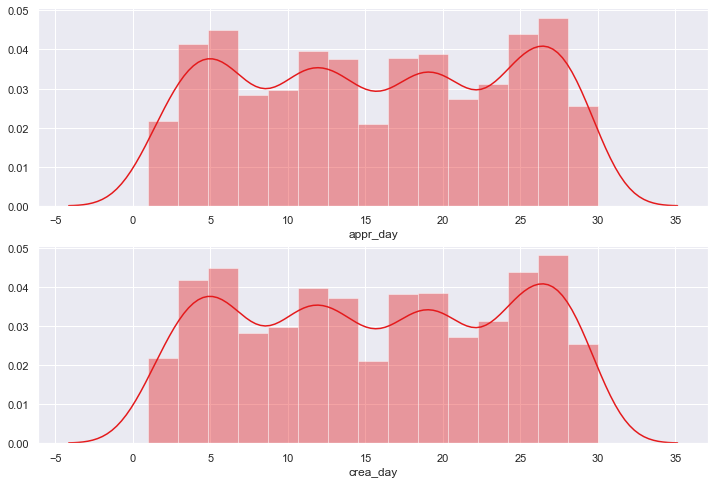

In [126]:
plt.figure(figsize=(10,6))

figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(12,8))

# figure,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))

sns.distplot(main_df['appr_day'],ax=ax[0])
sns.distplot(main_df['crea_day'],ax=ax[1])

Both the distribution is almost the same, so lets keep only one variable in our modelling

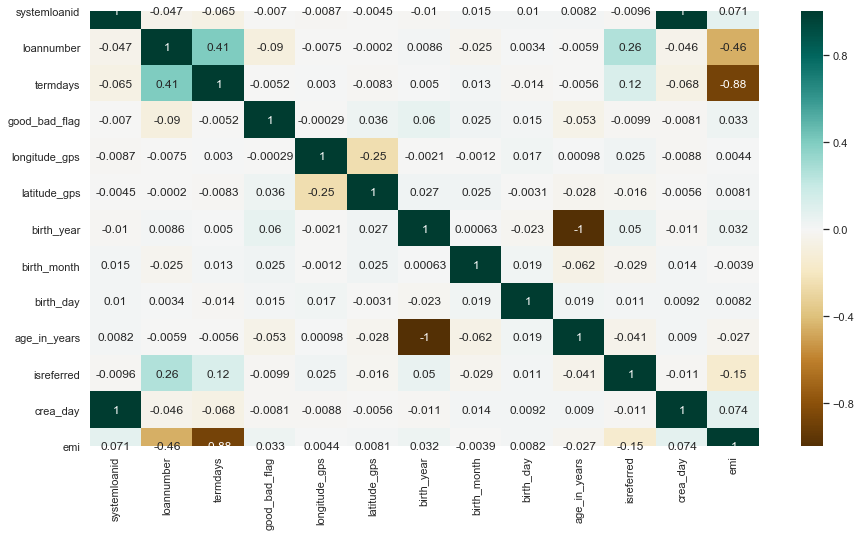

In [202]:
plt.figure(figsize=(15,8))

heatmap = sns.heatmap(model_df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Modelling preprocessing

In [128]:
main_df.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3781
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4335
employment_status_clients     1592
level_of_education_clients    3925
birth_year                    1099
birth_month                   1099
birth_day                     1099
age_in_years                  1099
isreferred                       0
appr_day                         0
crea_day                         0
dtype: int64

In [129]:
main_df.shape

(4368, 25)

In [130]:
for i in main_df.columns:
    print(i,'is',main_df[i].isnull().sum()/main_df.shape[0])
    

customerid is 0.0
systemloanid is 0.0
loannumber is 0.0
approveddate is 0.0
creationdate is 0.0
loanamount is 0.0
totaldue is 0.0
termdays is 0.0
referredby is 0.8656135531135531
good_bad_flag is 0.0
birthdate is 0.2516025641025641
bank_account_type is 0.2516025641025641
longitude_gps is 0.2516025641025641
latitude_gps is 0.2516025641025641
bank_name_clients is 0.2516025641025641
bank_branch_clients is 0.992445054945055
employment_status_clients is 0.36446886446886445
level_of_education_clients is 0.8985805860805861
birth_year is 0.2516025641025641
birth_month is 0.2516025641025641
birth_day is 0.2516025641025641
age_in_years is 0.2516025641025641
isreferred is 0.0
appr_day is 0.0
crea_day is 0.0


Here we can see level_of_education_clients,bank_branch_clients,referredby has huge missing values which is not easy to be imputed, so lets drop those columns

In [415]:
model_df = main_df.drop(['level_of_education_clients','bank_branch_clients','referredby'],axis=1)

In [416]:
model_df.isnull().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
birthdate                    1099
bank_account_type            1099
longitude_gps                1099
latitude_gps                 1099
bank_name_clients            1099
employment_status_clients    1592
birth_year                   1099
birth_month                  1099
birth_day                    1099
age_in_years                 1099
isreferred                      0
appr_day                        0
crea_day                        0
dtype: int64

##### Imputing NULL values

In [417]:
model_df['age_in_years'].mean()

35.59528907922912

In [418]:
model_df['age_in_years'].fillna(35.5,inplace=True)

In [419]:
model_df['bank_account_type'].value_counts()

Savings    2570
Other       653
Current      46
Name: bank_account_type, dtype: int64

In [420]:
model_df['bank_account_type'].fillna('Savings',inplace=True)

In [421]:
model_df['bank_name_clients'].value_counts()

GT Bank               1207
First Bank             430
Access Bank            328
UBA                    267
Zenith Bank            224
Diamond Bank           216
Stanbic IBTC           117
EcoBank                116
FCMB                    89
Skye Bank               75
Fidelity Bank           74
Sterling Bank           42
Wema Bank               19
Heritage Bank           18
Union Bank              15
Keystone Bank           14
Standard Chartered      13
Unity Bank               5
Name: bank_name_clients, dtype: int64

In [422]:
model_df['bank_name_clients'].mode()

0    GT Bank
Name: bank_name_clients, dtype: category
Categories (18, object): [Access Bank, Diamond Bank, EcoBank, FCMB, ..., Union Bank, Unity Bank, Wema Bank, Zenith Bank]

In [423]:
model_df['bank_name_clients'].fillna('GT Bank',inplace=True)

In [424]:
model_df['employment_status_clients'].mode()

0    Permanent
Name: employment_status_clients, dtype: category
Categories (6, object): [Contract, Permanent, Retired, Self-Employed, Student, Unemployed]

In [425]:
model_df['employment_status_clients'].fillna('Permanent',inplace=True)

In [426]:
model_df.isnull().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
birthdate                    1099
bank_account_type               0
longitude_gps                1099
latitude_gps                 1099
bank_name_clients               0
employment_status_clients       0
birth_year                   1099
birth_month                  1099
birth_day                    1099
age_in_years                    0
isreferred                      0
appr_day                        0
crea_day                        0
dtype: int64

In [427]:
model_df['good_bad_flag'].value_counts()

Good    3416
Bad      952
Name: good_bad_flag, dtype: int64

In [428]:
model_df['good_bad_flag'] = model_df['good_bad_flag'].replace(to_replace=['Good','Bad'],value=[0,1])

In [429]:
model_df.dtypes

customerid                           object
systemloanid                          int64
loannumber                            int64
approveddate                 datetime64[ns]
creationdate                 datetime64[ns]
loanamount                          float64
totaldue                            float64
termdays                              int64
good_bad_flag                         int64
birthdate                    datetime64[ns]
bank_account_type                  category
longitude_gps                       float64
latitude_gps                        float64
bank_name_clients                  category
employment_status_clients          category
birth_year                          float64
birth_month                         float64
birth_day                           float64
age_in_years                        float64
isreferred                            int64
appr_day                              int64
crea_day                              int64
dtype: object

In [431]:
model_df['emi'] = model_df['totaldue'] - model_df['loanamount']

In [432]:
model_df['emi'].min() ,  model_df['emi'].max()

(0.0, 9000.0)

In [433]:
pd.crosstab(model_df['emi'],model_df['good_bad_flag'])

good_bad_flag,0,1
emi,,
0.0,1,0
250.0,1,0
500.0,3,0
750.0,14,0
1000.0,19,0
1125.0,37,2
1500.0,555,174
1687.5,16,2
1750.0,2,1


In [441]:
model_df['emi_bins'] = pd.cut(model_df['emi'], bins=[0,1500,3000,4500,10000], labels=['below 2k','below 3k','below 5k','below 9k'])

In [446]:
model_df[model_df['emi_bins'].isnull() == True]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,birth_year,birth_month,birth_day,age_in_years,isreferred,appr_day,crea_day,emi,emi_bins
467,8a858f3e589c40610158a57d427715a6,302001054,12,2017-07-28 17:42:50,2017-07-28 16:42:40,10000.0,10000.0,15,0,1990-05-01,Savings,3.807913,7.400132,GT Bank,Permanent,1990.0,5.0,1.0,30.0,1,28,28,0.0,NaN


In [447]:
model_df['emi_bins'].fillna('below 2k',inplace=True)

In [448]:
pd.crosstab(model_df['emi_bins'],model_df['good_bad_flag'])

good_bad_flag,0,1
emi_bins,,
below 2k,630,176
below 3k,1428,518
below 5k,1111,187
below 9k,247,71


In [449]:
model_df.dtypes

customerid                           object
systemloanid                          int64
loannumber                            int64
approveddate                 datetime64[ns]
creationdate                 datetime64[ns]
loanamount                         category
totaldue                           category
termdays                              int64
good_bad_flag                         int64
birthdate                    datetime64[ns]
bank_account_type                  category
longitude_gps                       float64
latitude_gps                        float64
bank_name_clients                  category
employment_status_clients          category
birth_year                          float64
birth_month                         float64
birth_day                           float64
age_in_years                        float64
isreferred                            int64
appr_day                           category
crea_day                              int64
emi                             

In [450]:
model_df[['appr_day','loanamount','totaldue']] = model_df[['appr_day','loanamount','totaldue']].astype('category')

In [451]:
model_df.isnull().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
birthdate                    1099
bank_account_type               0
longitude_gps                1099
latitude_gps                 1099
bank_name_clients               0
employment_status_clients       0
birth_year                   1099
birth_month                  1099
birth_day                    1099
age_in_years                    0
isreferred                      0
appr_day                        0
crea_day                        0
emi                             0
emi_bins                        0
dtype: int64

In [452]:
model_df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'birth_year',
       'birth_month', 'birth_day', 'age_in_years', 'isreferred', 'appr_day',
       'crea_day', 'emi', 'emi_bins'],
      dtype='object')

In [454]:
model_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,birth_year,birth_month,birth_day,age_in_years,isreferred,appr_day,crea_day,emi,emi_bins
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,0,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,1972.0,1.0,15.0,48.0,1,25,25,4500.0,below 5k
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,1985.0,8.0,23.0,35.0,1,5,5,2250.0,below 3k
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,0,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,1984.0,9.0,18.0,35.0,1,6,6,2250.0,below 3k
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,0,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,1977.0,10.0,10.0,42.0,1,27,27,1500.0,below 2k
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,0,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,1986.0,9.0,7.0,34.0,1,3,3,4000.0,below 5k


In [455]:
model_df_basic = model_df[['loannumber',
       'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'bank_account_type','bank_name_clients', 'employment_status_clients','isreferred','appr_day','age_in_years']]

In [456]:
final_df = model_df_basic

In [457]:
final_df.dtypes

loannumber                      int64
loanamount                   category
totaldue                     category
termdays                        int64
good_bad_flag                   int64
bank_account_type            category
bank_name_clients            category
employment_status_clients    category
isreferred                      int64
appr_day                     category
age_in_years                  float64
dtype: object

In [458]:
final_df.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,bank_name_clients,employment_status_clients,isreferred,appr_day,age_in_years
0,12,30000.0,34500.0,30,0,Other,Diamond Bank,Permanent,1,25,48.0
1,2,15000.0,17250.0,30,0,Savings,GT Bank,Permanent,1,5,35.0
2,7,20000.0,22250.0,15,0,Other,EcoBank,Permanent,1,6,35.0
3,3,10000.0,11500.0,15,0,Savings,First Bank,Permanent,1,27,42.0
4,9,40000.0,44000.0,30,0,Other,GT Bank,Permanent,1,3,34.0


In [459]:
final_df.isnull().sum()

loannumber                   0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
bank_account_type            0
bank_name_clients            0
employment_status_clients    0
isreferred                   0
appr_day                     0
age_in_years                 0
dtype: int64

In [460]:
mylist = list(final_df.select_dtypes(include=['category']).columns)

In [461]:
mylist

['loanamount',
 'totaldue',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'appr_day']

In [462]:
dummies = pd.get_dummies(final_df[mylist],prefix=mylist,drop_first=True)
final_df.drop(mylist,axis=1,inplace=True)
final_df = pd.concat([final_df,dummies],axis=1)

In [463]:
final_df['good_bad_flag'] = final_df['good_bad_flag'].astype('category')

In [464]:

pd.set_option('display.max_columns', 5400)
pd.set_option('display.max_colwidth', 500)

In [465]:
final_df.dtypes

loannumber          int64
termdays            int64
good_bad_flag    category
isreferred          int64
age_in_years      float64
                   ...   
appr_day_26         uint8
appr_day_27         uint8
appr_day_28         uint8
appr_day_29         uint8
appr_day_30         uint8
Length: 113, dtype: object

In [466]:
x = final_df.drop('good_bad_flag',axis=1)
y = final_df['good_bad_flag']

In [467]:
x.shape, y.shape

((4368, 112), (4368,))

In [468]:
final_df['good_bad_flag'].value_counts(normalize=True)

0    0.782051
1    0.217949
Name: good_bad_flag, dtype: float64

In [469]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,  random_state = 56, stratify=y,test_size=0.25)

# Logistic reg without Normlaising and feature engineering

In [470]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [471]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Making predictions using predict function

In [472]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [473]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.0110803324099723


In [474]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k_wf_wnm = f1_score(test_predict, test_y)
print('Test f1_score    ', k_wf_wnm )

Test f1_score     0.008230452674897118


In [475]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_predict)
print(cf)

[[850   4]
 [237   1]]


In [476]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       854
           1       0.20      0.00      0.01       238

   micro avg       0.78      0.78      0.78      1092
   macro avg       0.49      0.50      0.44      1092
weighted avg       0.66      0.78      0.69      1092



# Normalising using min_max_scaler

In [477]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = train_x.columns

In [478]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,loannumber,termdays,isreferred,age_in_years,loanamount_15000.0,loanamount_20000.0,loanamount_25000.0,loanamount_30000.0,loanamount_35000.0,loanamount_40000.0,loanamount_45000.0,loanamount_50000.0,loanamount_60000.0,totaldue_10250.0,totaldue_10500.0,totaldue_10750.0,totaldue_11000.0,totaldue_11125.0,totaldue_11500.0,totaldue_12250.0,totaldue_12500.0,totaldue_13000.0,totaldue_15750.0,totaldue_16125.0,totaldue_16500.0,totaldue_16687.5,totaldue_17250.0,totaldue_18375.0,totaldue_20500.0,totaldue_21000.0,totaldue_21500.0,totaldue_21750.0,totaldue_22000.0,totaldue_22250.0,totaldue_23000.0,totaldue_24000.0,totaldue_24500.0,totaldue_27500.0,totaldue_28750.0,totaldue_31500.0,totaldue_33000.0,totaldue_33999.9,totaldue_34500.0,totaldue_36000.0,totaldue_38500.0,totaldue_38500.2,totaldue_39000.0,totaldue_42000.0,totaldue_43500.0,totaldue_44000.0,totaldue_48000.0,totaldue_49500.0,totaldue_52500.0,totaldue_55000.0,totaldue_57000.5,totaldue_57500.0,totaldue_62700.0,totaldue_65400.0,totaldue_68100.0,bank_account_type_Other,bank_account_type_Savings,bank_name_clients_Diamond Bank,bank_name_clients_EcoBank,bank_name_clients_FCMB,bank_name_clients_Fidelity Bank,bank_name_clients_First Bank,bank_name_clients_GT Bank,bank_name_clients_Heritage Bank,bank_name_clients_Keystone Bank,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,appr_day_2,appr_day_3,appr_day_4,appr_day_5,appr_day_6,appr_day_7,appr_day_8,appr_day_9,appr_day_10,appr_day_11,appr_day_12,appr_day_13,appr_day_14,appr_day_15,appr_day_16,appr_day_17,appr_day_18,appr_day_19,appr_day_20,appr_day_21,appr_day_22,appr_day_23,appr_day_24,appr_day_25,appr_day_26,appr_day_27,appr_day_28,appr_day_29,appr_day_30
0,0.00,0.2,1.0,0.323529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.2,1.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.12,0.2,1.0,0.529412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.00,0.2,1.0,0.264706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.04,0.2,1.0,0.323529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [479]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,loannumber,termdays,isreferred,age_in_years,loanamount_15000.0,loanamount_20000.0,loanamount_25000.0,loanamount_30000.0,loanamount_35000.0,loanamount_40000.0,loanamount_45000.0,loanamount_50000.0,loanamount_60000.0,totaldue_10250.0,totaldue_10500.0,totaldue_10750.0,totaldue_11000.0,totaldue_11125.0,totaldue_11500.0,totaldue_12250.0,totaldue_12500.0,totaldue_13000.0,totaldue_15750.0,totaldue_16125.0,totaldue_16500.0,totaldue_16687.5,totaldue_17250.0,totaldue_18375.0,totaldue_20500.0,totaldue_21000.0,totaldue_21500.0,totaldue_21750.0,totaldue_22000.0,totaldue_22250.0,totaldue_23000.0,totaldue_24000.0,totaldue_24500.0,totaldue_27500.0,totaldue_28750.0,totaldue_31500.0,totaldue_33000.0,totaldue_33999.9,totaldue_34500.0,totaldue_36000.0,totaldue_38500.0,totaldue_38500.2,totaldue_39000.0,totaldue_42000.0,totaldue_43500.0,totaldue_44000.0,totaldue_48000.0,totaldue_49500.0,totaldue_52500.0,totaldue_55000.0,totaldue_57000.5,totaldue_57500.0,totaldue_62700.0,totaldue_65400.0,totaldue_68100.0,bank_account_type_Other,bank_account_type_Savings,bank_name_clients_Diamond Bank,bank_name_clients_EcoBank,bank_name_clients_FCMB,bank_name_clients_Fidelity Bank,bank_name_clients_First Bank,bank_name_clients_GT Bank,bank_name_clients_Heritage Bank,bank_name_clients_Keystone Bank,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,appr_day_2,appr_day_3,appr_day_4,appr_day_5,appr_day_6,appr_day_7,appr_day_8,appr_day_9,appr_day_10,appr_day_11,appr_day_12,appr_day_13,appr_day_14,appr_day_15,appr_day_16,appr_day_17,appr_day_18,appr_day_19,appr_day_20,appr_day_21,appr_day_22,appr_day_23,appr_day_24,appr_day_25,appr_day_26,appr_day_27,appr_day_28,appr_day_29,appr_day_30
0,0.04,0.2,0.0,0.235294,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,1.0,0.294118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.56,0.2,1.0,0.558824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.28,0.2,1.0,0.205882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.2,1.0,0.470588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [480]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [481]:
train_predict = logreg.predict(train_x)

# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k_norm_wf = f1_score(test_predict, test_y)
print('Test f1_score    ', k_norm_wf )

Test f1_score     0.008230452674897118


# Logreg with feature engineered variables

In [482]:
model_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,birth_year,birth_month,birth_day,age_in_years,isreferred,appr_day,crea_day,emi,emi_bins
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,0,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,1972.0,1.0,15.0,48.0,1,25,25,4500.0,below 5k
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,1985.0,8.0,23.0,35.0,1,5,5,2250.0,below 3k
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,0,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,1984.0,9.0,18.0,35.0,1,6,6,2250.0,below 3k
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,0,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,1977.0,10.0,10.0,42.0,1,27,27,1500.0,below 2k
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,0,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,1986.0,9.0,7.0,34.0,1,3,3,4000.0,below 5k


In [483]:
model_df.isnull().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
birthdate                    1099
bank_account_type               0
longitude_gps                1099
latitude_gps                 1099
bank_name_clients               0
employment_status_clients       0
birth_year                   1099
birth_month                  1099
birth_day                    1099
age_in_years                    0
isreferred                      0
appr_day                        0
crea_day                        0
emi                             0
emi_bins                        0
dtype: int64

In [484]:
model_df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'birth_year',
       'birth_month', 'birth_day', 'age_in_years', 'isreferred', 'appr_day',
       'crea_day', 'emi', 'emi_bins'],
      dtype='object')

In [485]:
model_df.dtypes

customerid                           object
systemloanid                          int64
loannumber                            int64
approveddate                 datetime64[ns]
creationdate                 datetime64[ns]
loanamount                         category
totaldue                           category
termdays                              int64
good_bad_flag                         int64
birthdate                    datetime64[ns]
bank_account_type                  category
longitude_gps                       float64
latitude_gps                        float64
bank_name_clients                  category
employment_status_clients          category
birth_year                          float64
birth_month                         float64
birth_day                           float64
age_in_years                        float64
isreferred                            int64
appr_day                           category
crea_day                              int64
emi                             

In [486]:
model_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,birth_year,birth_month,birth_day,age_in_years,isreferred,appr_day,crea_day,emi,emi_bins
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,0,1972-01-15,Other,3.432010,6.433055,Diamond Bank,Permanent,1972.0,1.0,15.0,48.0,1,25,25,4500.0,below 5k
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,1985.0,8.0,23.0,35.0,1,5,5,2250.0,below 3k
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,0,1984-09-18,Other,11.139350,10.292041,EcoBank,Permanent,1984.0,9.0,18.0,35.0,1,6,6,2250.0,below 3k
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,0,1977-10-10,Savings,3.985770,7.491708,First Bank,Permanent,1977.0,10.0,10.0,42.0,1,27,27,1500.0,below 2k
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,0,1986-09-07,Other,7.457913,9.076574,GT Bank,Permanent,1986.0,9.0,7.0,34.0,1,3,3,4000.0,below 5k


In [488]:
feat_model = model_df[['loannumber','loanamount','termdays','good_bad_flag',
                       'bank_account_type','bank_name_clients','employment_status_clients',
                       'age_in_years', 'isreferred', 'appr_day','emi_bins']]

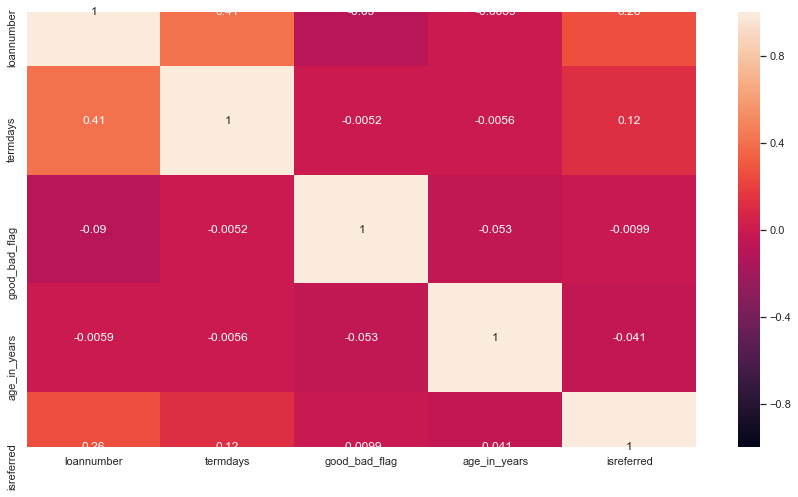

In [489]:
plt.figure(figsize=(15,8))

sns.heatmap(feat_model.corr(),vmin=-1,vmax=1,annot=True)

In [490]:
feat_model = model_df[['loannumber','loanamount','good_bad_flag',
                       'bank_account_type','bank_name_clients','employment_status_clients',
                       'age_in_years', 'isreferred', 'appr_day','emi_bins']]

In [491]:
feat_model.head()

,loannumber,loanamount,good_bad_flag,bank_account_type,bank_name_clients,employment_status_clients,age_in_years,isreferred,appr_day,emi_bins
0,12,30000.0,0,Other,Diamond Bank,Permanent,48.0,1,25,below 5k
1,2,15000.0,0,Savings,GT Bank,Permanent,35.0,1,5,below 3k
2,7,20000.0,0,Other,EcoBank,Permanent,35.0,1,6,below 3k
3,3,10000.0,0,Savings,First Bank,Permanent,42.0,1,27,below 2k
4,9,40000.0,0,Other,GT Bank,Permanent,34.0,1,3,below 5k


In [492]:
mylist = list(feat_model.select_dtypes(include=['category']).columns)
print('\n',mylist,'\n')

dummies = pd.get_dummies(feat_model[mylist],prefix=mylist,drop_first=True)
feat_model.drop(mylist,axis=1,inplace=True)
feat_model = pd.concat([feat_model,dummies],axis=1)


 ['loanamount', 'bank_account_type', 'bank_name_clients', 'employment_status_clients', 'appr_day', 'emi_bins'] 



In [493]:
feat_model['good_bad_flag'] = feat_model['good_bad_flag'].astype('category')

In [494]:
x = feat_model.drop('good_bad_flag',axis=1)
y = feat_model['good_bad_flag']

In [495]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,  random_state = 56, stratify=y,test_size=0.25)

In [496]:
cols = train_x.columns

In [497]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,loannumber,age_in_years,isreferred,loanamount_15000.0,loanamount_20000.0,loanamount_25000.0,loanamount_30000.0,loanamount_35000.0,loanamount_40000.0,loanamount_45000.0,loanamount_50000.0,loanamount_60000.0,bank_account_type_Other,bank_account_type_Savings,bank_name_clients_Diamond Bank,bank_name_clients_EcoBank,bank_name_clients_FCMB,bank_name_clients_Fidelity Bank,bank_name_clients_First Bank,bank_name_clients_GT Bank,bank_name_clients_Heritage Bank,bank_name_clients_Keystone Bank,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,appr_day_2,appr_day_3,appr_day_4,appr_day_5,appr_day_6,appr_day_7,appr_day_8,appr_day_9,appr_day_10,appr_day_11,appr_day_12,appr_day_13,appr_day_14,appr_day_15,appr_day_16,appr_day_17,appr_day_18,appr_day_19,appr_day_20,appr_day_21,appr_day_22,appr_day_23,appr_day_24,appr_day_25,appr_day_26,appr_day_27,appr_day_28,appr_day_29,appr_day_30,emi_bins_below 3k,emi_bins_below 5k,emi_bins_below 9k
0,0.00,0.323529,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.00,0.029412,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.12,0.529412,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.00,0.264706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.04,0.323529,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [498]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,loannumber,age_in_years,isreferred,loanamount_15000.0,loanamount_20000.0,loanamount_25000.0,loanamount_30000.0,loanamount_35000.0,loanamount_40000.0,loanamount_45000.0,loanamount_50000.0,loanamount_60000.0,bank_account_type_Other,bank_account_type_Savings,bank_name_clients_Diamond Bank,bank_name_clients_EcoBank,bank_name_clients_FCMB,bank_name_clients_Fidelity Bank,bank_name_clients_First Bank,bank_name_clients_GT Bank,bank_name_clients_Heritage Bank,bank_name_clients_Keystone Bank,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,appr_day_2,appr_day_3,appr_day_4,appr_day_5,appr_day_6,appr_day_7,appr_day_8,appr_day_9,appr_day_10,appr_day_11,appr_day_12,appr_day_13,appr_day_14,appr_day_15,appr_day_16,appr_day_17,appr_day_18,appr_day_19,appr_day_20,appr_day_21,appr_day_22,appr_day_23,appr_day_24,appr_day_25,appr_day_26,appr_day_27,appr_day_28,appr_day_29,appr_day_30,emi_bins_below 3k,emi_bins_below 5k,emi_bins_below 9k
0,0.04,0.235294,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.00,0.294118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.56,0.558824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.28,0.205882,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.00,0.470588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [499]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [500]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict
# Calculating f1-score
k_with_feat = f1_score(train_predict, train_y)
print('Training f1_score', k_with_feat )

Training f1_score 0.008321775312066574


In [501]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k_with_feat = f1_score(test_predict, test_y)
print('Test f1_score    ', k_with_feat )

Test f1_score     0.008264462809917356


# Logreg scaled

In [502]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x_scaled, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [503]:
# Predicting over the Train
train_predict = logreg.predict(train_x_scaled)
train_predict
# Calculating f1-score
k_with_feat_s = f1_score(train_predict, train_y)
print('Training f1_score', k_with_feat_s )

Training f1_score 0.008333333333333333


In [504]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x_scaled)
k_with_feat_s = f1_score(test_predict, test_y)
print('Test f1_score    ', k_with_feat_s )

Test f1_score     0.0


# Previous data loading

In [505]:
df3 = pd.read_csv('trainprevloans.csv')

In [506]:
df3.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [507]:
# df3[['approveddate','creationdate','closeddate','firstduedate','firstrepaiddate']] = pd.to_datetime(df3[['approveddate','creationdate','closeddate','firstduedate','firstrepaiddate']],format='%Y-%m-%d %H:%M:%S')

df3['firstduedate'] = pd.to_datetime(df3['firstduedate'])
df3['firstrepaiddate'] = pd.to_datetime(df3['firstrepaiddate'])
df3['closeddate'] = pd.to_datetime(df3['closeddate'])
df3['creationdate'] = pd.to_datetime(df3['creationdate'])
df3['approveddate'] = pd.to_datetime(df3['approveddate'])

In [508]:
df3.dtypes

customerid                 object
systemloanid                int64
loannumber                  int64
approveddate       datetime64[ns]
creationdate       datetime64[ns]
loanamount                float64
totaldue                  float64
termdays                    int64
closeddate         datetime64[ns]
referredby                 object
firstduedate       datetime64[ns]
firstrepaiddate    datetime64[ns]
dtype: object

In [509]:
df3.isnull().sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

In [510]:
df3.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35


In [512]:
df3['paid_in_time'] = ((df3['firstrepaiddate'] - df3['approveddate']).astype('timedelta64[D]')) - df3['termdays'] 

In [513]:
df3['paid_in_time_yes_or_no'] = df3['paid_in_time'].apply(lambda x : 'paid' if x<=0 else 'not paid')

In [514]:
df3['paid_in_time_yes_or_no'].value_counts()

paid        14613
not paid     3570
Name: paid_in_time_yes_or_no, dtype: int64

In [515]:
defa = pd.crosstab(df3['customerid'],df3['paid_in_time_yes_or_no'])

In [516]:
defa

paid_in_time_yes_or_no,not paid,paid
customerid,,
8a1088a0484472eb01484669e3ce4e0b,1,0
8a1a1e7e4f707f8b014f797718316cad,1,3
8a1a32fc49b632520149c3b8fdf85139,0,7
8a1eb5ba49a682300149c3c068b806c7,0,8
8a1edbf14734127f0147356fdb1b1eb2,0,2
...,...,...
8a858fff5a28d297015a33bc2e845305,0,6
8a858fff5a36fe68015a37f8550a02a2,0,6
8a858fff5a36fe68015a3ac5851618ab,0,1


In [517]:
defa['is_default'] = (defa['paid'] - defa['not paid'])

In [518]:
defa['is_default_bool'] = defa['is_default'].apply(lambda x : 'Bad' if x < 0 else 'Good' )

In [519]:
defa['is_default_bool'].value_counts()

Good    3723
Bad      636
Name: is_default_bool, dtype: int64

In [520]:
defa.reset_index(inplace=True)

In [521]:
df3[df3['customerid'] == '8a1a1e7e4f707f8b014f797718316cad']

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,paid_in_time,paid_in_time_yes_or_no
5216,8a1a1e7e4f707f8b014f797718316cad,301620412,1,2016-05-13 15:29:37,2016-05-13 14:29:31,10000.0,13000.0,30,2016-06-15 00:03:33,NaN,2016-06-13,2016-06-14 10:41:13,1.0,not paid
7999,8a1a1e7e4f707f8b014f797718316cad,301916386,3,2017-05-23 14:21:42,2017-05-23 13:20:30,20000.0,24500.0,30,2017-06-21 21:58:00,NaN,2017-06-22,2017-06-21 21:47:51,-1.0,paid
16602,8a1a1e7e4f707f8b014f797718316cad,301947045,4,2017-06-21 22:09:51,2017-06-21 21:09:44,30000.0,39000.0,60,2017-07-26 19:48:11,NaN,2017-07-21,2017-07-20 15:05:33,-32.0,paid
17546,8a1a1e7e4f707f8b014f797718316cad,301632940,2,2016-06-15 11:22:38,2016-06-15 10:22:32,10000.0,13000.0,30,2016-07-15 13:59:02,NaN,2016-07-15,2016-07-15 13:43:58,0.0,paid


In [522]:
defa.shape

(4359, 5)

In [523]:
main_df.shape

(4368, 25)

In [524]:
defa.head()

paid_in_time_yes_or_no,customerid,not paid,paid,is_default,is_default_bool
0,8a1088a0484472eb01484669e3ce4e0b,1,0,-1,Bad
1,8a1a1e7e4f707f8b014f797718316cad,1,3,2,Good
2,8a1a32fc49b632520149c3b8fdf85139,0,7,7,Good
3,8a1eb5ba49a682300149c3c068b806c7,0,8,8,Good
4,8a1edbf14734127f0147356fdb1b1eb2,0,2,2,Good


In [525]:
defa1 = defa[['customerid','is_default_bool']]

In [526]:
defa1['is_default_bool'] = defa1['is_default_bool'].replace(to_replace=['Good','Bad'],value=[0,1])

In [527]:
defa1

paid_in_time_yes_or_no,customerid,is_default_bool
0,8a1088a0484472eb01484669e3ce4e0b,1
1,8a1a1e7e4f707f8b014f797718316cad,0
2,8a1a32fc49b632520149c3b8fdf85139,0
3,8a1eb5ba49a682300149c3c068b806c7,0
4,8a1edbf14734127f0147356fdb1b1eb2,0
...,...,...
4354,8a858fff5a28d297015a33bc2e845305,0
4355,8a858fff5a36fe68015a37f8550a02a2,0
4356,8a858fff5a36fe68015a3ac5851618ab,0
4357,8a858fff5a36fe68015a3b8dcb8a3843,0


In [528]:
three_df = model_df.merge(defa1,on='customerid',how='left')

In [529]:
three_df[three_df['is_default_bool'].isnull() == True]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,birth_year,birth_month,birth_day,age_in_years,isreferred,appr_day,crea_day,emi,emi_bins,is_default_bool
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,1985.0,8.0,23.0,35.0,1,5,5,2250.0,below 3k,NaN
303,8a76e7d443e6e97c0143ed0a13cb4f61,301999706,4,2017-07-28 00:12:31,2017-07-27 23:11:19,30000.0,39000.0,60,1,1974-02-23,Savings,3.323364,6.606437,GT Bank,Permanent,1974.0,2.0,23.0,46.0,1,28,27,9000.0,below 9k,NaN
2221,8a858e4357be1daf0157c96f4c915ef0,302001005,2,2017-07-28 17:15:11,2017-07-28 16:15:03,10000.0,11500.0,15,0,1981-01-22,Savings,5.226327,7.596272,Diamond Bank,Permanent,1981.0,1.0,22.0,39.0,1,28,28,1500.0,below 2k,NaN
2949,8a858fda56562f8f01565f928f516cea,301998904,2,2017-07-27 14:38:40,2017-07-27 13:37:26,10000.0,13000.0,30,1,1969-12-29,Savings,3.386796,6.462141,UBA,Permanent,1969.0,12.0,29.0,50.0,1,27,27,3000.0,below 3k,NaN
3262,8a5cfa8345d40fb80145dc328532397a,301974306,6,2017-07-12 10:24:49,2017-07-12 09:23:37,10000.0,11000.0,30,0,NaT,Savings,NaN,NaN,GT Bank,Permanent,NaN,NaN,NaN,35.5,1,12,12,1000.0,below 2k,NaN
3389,8a858f6f57d2acb50157dca4f81540e2,301959311,2,2017-07-01 19:02:44,2017-07-01 18:01:36,10000.0,13000.0,30,0,NaT,Savings,NaN,NaN,GT Bank,Permanent,NaN,NaN,NaN,35.5,1,1,1,3000.0,below 3k,NaN
3686,8a858ecc57b9184b0157c4ffc1b80614,301997744,2,2017-07-26 20:46:27,2017-07-26 19:46:20,10000.0,13000.0,30,1,NaT,Savings,NaN,NaN,GT Bank,Permanent,NaN,NaN,NaN,35.5,1,26,26,3000.0,below 3k,NaN
3776,8a858f9d5668e3f1015679951579076f,301990749,2,2017-07-22 13:13:25,2017-07-22 12:13:10,10000.0,11500.0,15,0,NaT,Savings,NaN,NaN,GT Bank,Permanent,NaN,NaN,NaN,35.5,1,22,22,1500.0,below 2k,NaN
3849,8a858e69566ae5b801567ac352d84477,301992704,2,2017-07-24 05:32:11,2017-07-24 04:31:53,10000.0,13000.0,30,0,1981-05-14,Savings,3.368366,7.121289,Wema Bank,Permanent,1981.0,5.0,14.0,39.0,1,24,24,3000.0,below 3k,NaN


In [530]:
three_df['age_bins'] = pd.cut(three_df['age_in_years'],bins=[0,30,40,80],labels=['Teenager','Adult','old age'])

In [531]:
three_df['is_default_bool'] = three_df['is_default_bool'].astype('category')

In [532]:
three_df.isnull().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
birthdate                    1099
bank_account_type               0
longitude_gps                1099
latitude_gps                 1099
bank_name_clients               0
employment_status_clients       0
birth_year                   1099
birth_month                  1099
birth_day                    1099
age_in_years                    0
isreferred                      0
appr_day                        0
crea_day                        0
emi                             0
emi_bins                        0
is_default_bool                 9
age_bins                        0
dtype: int64

In [533]:
pd.crosstab(three_df['age_bins'],three_df['good_bad_flag'])

good_bad_flag,0,1
age_bins,,
Teenager,494,193
Adult,2405,632
old age,517,127


In [534]:
three_df[three_df['is_default_bool'].isnull() == True]

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,birth_year,birth_month,birth_day,age_in_years,isreferred,appr_day,crea_day,emi,emi_bins,is_default_bool,age_bins
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,1985-08-23,Savings,3.885298,7.320700,GT Bank,Permanent,1985.0,8.0,23.0,35.0,1,5,5,2250.0,below 3k,NaN,Adult
303,8a76e7d443e6e97c0143ed0a13cb4f61,301999706,4,2017-07-28 00:12:31,2017-07-27 23:11:19,30000.0,39000.0,60,1,1974-02-23,Savings,3.323364,6.606437,GT Bank,Permanent,1974.0,2.0,23.0,46.0,1,28,27,9000.0,below 9k,NaN,old age
2221,8a858e4357be1daf0157c96f4c915ef0,302001005,2,2017-07-28 17:15:11,2017-07-28 16:15:03,10000.0,11500.0,15,0,1981-01-22,Savings,5.226327,7.596272,Diamond Bank,Permanent,1981.0,1.0,22.0,39.0,1,28,28,1500.0,below 2k,NaN,Adult
2949,8a858fda56562f8f01565f928f516cea,301998904,2,2017-07-27 14:38:40,2017-07-27 13:37:26,10000.0,13000.0,30,1,1969-12-29,Savings,3.386796,6.462141,UBA,Permanent,1969.0,12.0,29.0,50.0,1,27,27,3000.0,below 3k,NaN,old age
3262,8a5cfa8345d40fb80145dc328532397a,301974306,6,2017-07-12 10:24:49,2017-07-12 09:23:37,10000.0,11000.0,30,0,NaT,Savings,NaN,NaN,GT Bank,Permanent,NaN,NaN,NaN,35.5,1,12,12,1000.0,below 2k,NaN,Adult
3389,8a858f6f57d2acb50157dca4f81540e2,301959311,2,2017-07-01 19:02:44,2017-07-01 18:01:36,10000.0,13000.0,30,0,NaT,Savings,NaN,NaN,GT Bank,Permanent,NaN,NaN,NaN,35.5,1,1,1,3000.0,below 3k,NaN,Adult
3686,8a858ecc57b9184b0157c4ffc1b80614,301997744,2,2017-07-26 20:46:27,2017-07-26 19:46:20,10000.0,13000.0,30,1,NaT,Savings,NaN,NaN,GT Bank,Permanent,NaN,NaN,NaN,35.5,1,26,26,3000.0,below 3k,NaN,Adult
3776,8a858f9d5668e3f1015679951579076f,301990749,2,2017-07-22 13:13:25,2017-07-22 12:13:10,10000.0,11500.0,15,0,NaT,Savings,NaN,NaN,GT Bank,Permanent,NaN,NaN,NaN,35.5,1,22,22,1500.0,below 2k,NaN,Adult
3849,8a858e69566ae5b801567ac352d84477,301992704,2,2017-07-24 05:32:11,2017-07-24 04:31:53,10000.0,13000.0,30,0,1981-05-14,Savings,3.368366,7.121289,Wema Bank,Permanent,1981.0,5.0,14.0,39.0,1,24,24,3000.0,below 3k,NaN,Adult


In [535]:
three_df['is_default_bool'].fillna(0,inplace=True)

In [536]:
three_df.isnull().sum()

customerid                      0
systemloanid                    0
loannumber                      0
approveddate                    0
creationdate                    0
loanamount                      0
totaldue                        0
termdays                        0
good_bad_flag                   0
birthdate                    1099
bank_account_type               0
longitude_gps                1099
latitude_gps                 1099
bank_name_clients               0
employment_status_clients       0
birth_year                   1099
birth_month                  1099
birth_day                    1099
age_in_years                    0
isreferred                      0
appr_day                        0
crea_day                        0
emi                             0
emi_bins                        0
is_default_bool                 0
age_bins                        0
dtype: int64

In [537]:
three_df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'birth_year',
       'birth_month', 'birth_day', 'age_in_years', 'isreferred', 'appr_day',
       'crea_day', 'emi', 'emi_bins', 'is_default_bool', 'age_bins'],
      dtype='object')

In [595]:
model_df_basic = three_df[['loannumber',
       'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'bank_account_type','bank_name_clients', 'employment_status_clients','isreferred','appr_day','age_bins','is_default_bool','emi_bins']]

In [596]:
final_df = model_df_basic
final_df.dtypes

loannumber                      int64
loanamount                   category
totaldue                     category
termdays                        int64
good_bad_flag                   int64
bank_account_type            category
bank_name_clients            category
employment_status_clients    category
isreferred                      int64
appr_day                     category
age_bins                     category
is_default_bool              category
emi_bins                     category
dtype: object

In [597]:
final_df['is_default_bool'] = final_df['is_default_bool'].astype('object')
final_df['termdays'] = final_df['termdays'].astype('category')
final_df['isreferred'] = final_df['isreferred'].astype('object')

final_df['loanamount'] = final_df['loanamount'].astype('object')

In [598]:
final_df.dtypes

loannumber                      int64
loanamount                     object
totaldue                     category
termdays                     category
good_bad_flag                   int64
bank_account_type            category
bank_name_clients            category
employment_status_clients    category
isreferred                     object
appr_day                     category
age_bins                     category
is_default_bool                object
emi_bins                     category
dtype: object

In [599]:
final_df.head()

,loannumber,loanamount,totaldue,termdays,good_bad_flag,bank_account_type,bank_name_clients,employment_status_clients,isreferred,appr_day,age_bins,is_default_bool,emi_bins
0,12,30000,34500.0,30,0,Other,Diamond Bank,Permanent,1,25,old age,0,below 5k
1,2,15000,17250.0,30,0,Savings,GT Bank,Permanent,1,5,Adult,0,below 3k
2,7,20000,22250.0,15,0,Other,EcoBank,Permanent,1,6,Adult,0,below 3k
3,3,10000,11500.0,15,0,Savings,First Bank,Permanent,1,27,old age,1,below 2k
4,9,40000,44000.0,30,0,Other,GT Bank,Permanent,1,3,Adult,0,below 5k


In [600]:
mylist = list(final_df.select_dtypes(include=['category']).columns)

print(mylist,'\n')

dummies = pd.get_dummies(final_df[mylist],prefix=mylist,drop_first=True)
final_df.drop(mylist,axis=1,inplace=True)
final_df = pd.concat([final_df,dummies],axis=1)

['totaldue', 'termdays', 'bank_account_type', 'bank_name_clients', 'employment_status_clients', 'appr_day', 'age_bins', 'emi_bins'] 



In [601]:
dum = pd.get_dummies(final_df['loanamount'])
final_df.drop(['loanamount'],axis=1,inplace=True)
final_df = pd.concat([final_df,dum],axis=1)

In [602]:
final_df.columns

Index([      'loannumber',    'good_bad_flag',       'isreferred',
        'is_default_bool', 'totaldue_10250.0', 'totaldue_10500.0',
       'totaldue_10750.0', 'totaldue_11000.0', 'totaldue_11125.0',
       'totaldue_11500.0',
       ...
                  10000.0,            15000.0,            20000.0,
                  25000.0,            30000.0,            35000.0,
                  40000.0,            45000.0,            50000.0,
                  60000.0],
      dtype='object', length=121)

In [830]:
final_df.to_csv('cleaned_loan.csv')

In [603]:
final_df['good_bad_flag'] = final_df['good_bad_flag'].astype('category')

In [813]:
x = final_df.drop('good_bad_flag',axis=1)
y = final_df['good_bad_flag']

x.shape, y.shape

((4368, 120), (4368,))

In [814]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,  random_state = 56, stratify=y,test_size=0.25)

In [826]:
# Creating instance of Logistic Regresssion
logreg = LogReg(class_weight='balanced')

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [827]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )


# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k_wf_wnm_new = f1_score(test_predict, test_y)
print('Test f1_score    ', k_wf_wnm_new )

Training f1_score 0.45569620253164556
Test f1_score     0.3451612903225806


In [828]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_predict)
print(cf)

[[579 275]
 [131 107]]


In [829]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       854
           1       0.28      0.45      0.35       238

   micro avg       0.63      0.63      0.63      1092
   macro avg       0.55      0.56      0.54      1092
weighted avg       0.70      0.63      0.65      1092



In [821]:
# Scaled features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = train_x.columns


train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()


test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()


# Creating instance of Logistic Regresssion
logreg = LogReg(class_weight='balanced')

# Fitting the model
logreg.fit(train_x, train_y)



train_predict = logreg.predict(train_x)

# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k_feat_prev = f1_score(test_predict, test_y)
print('Test f1_score    ', k_feat_prev )

Test f1_score     0.3451612903225806


In [796]:
# Predicting over the Train
train_predict = logreg.predict_proba(train_x)
train_predict

train_preds = train_predict[:,1]
train_preds



# Predicting over the Test Set and f1-score
test_predict = logreg.predict_proba(test_x)


test_preds = test_predict[:,1]
test_preds


array([0.22580954, 0.22000436, 0.02744416, ..., 0.1818813 , 0.08738479,
       0.09723361])

In [797]:
from sklearn.metrics import precision_recall_curve

precision_pts, recall_pts, threshold_pts  = precision_recall_curve(test_y , test_preds)

precision_pts.shape, recall_pts.shape, threshold_pts.shape

((965,), (965,), (964,))

Text(0, 0.5, 'Precision & Recall')

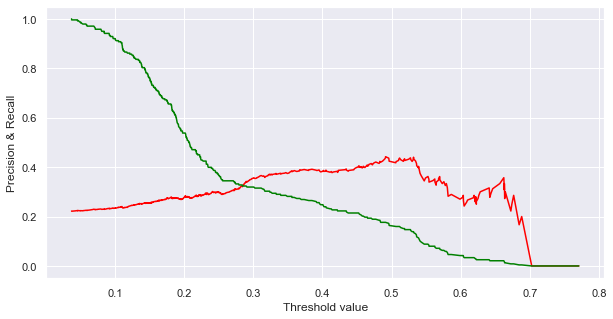

In [798]:
plt.figure(figsize=(10,5))

plt.plot( threshold_pts, precision_pts[:-1],color='red', label='Precision Curve')

plt.plot(threshold_pts, recall_pts[:-1],color='green',label='Recall Curve')

plt.xlabel('Threshold value')

plt.ylabel('Precision & Recall')

# Using Proba

In [825]:
# Predicting over the Train
train_predict = logreg.predict_proba(train_x)
train_predict

train_preds = train_predict[:,1]
train_preds


for i in range(0, len(train_preds)):
  if(train_preds[i]>0.31):
    train_preds[i] = 1
  else:
    train_preds[i] = 0
  

# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score_train', k )




# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)


# test_preds = test_predict[:,1]
# test_preds


# for i in range(0, len(test_preds)):
#   if(test_preds[i]>0.29):
#     test_preds[i] = 1
#   else:
#     test_preds[i] = 0




proba = f1_score(test_preds, test_y)
print('Test f1_score    ', proba )

Training f1_score_train 0.4067287473715831


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [785]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_preds)
print(cf)

[[706 148]
 [162  76]]


In [786]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_preds ))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       854
           1       0.34      0.32      0.33       238

   micro avg       0.72      0.72      0.72      1092
   macro avg       0.58      0.57      0.57      1092
weighted avg       0.71      0.72      0.71      1092



In [790]:
len(test_predict)

1092

In [658]:
from sklearn.tree import DecisionTreeClassifier

In [659]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [660]:
#fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [662]:
#checking the training score
dt_model.score(train_x, train_y)

0.9548229548229549

In [663]:
dt_model.predict(test_x)

#checking the validation score
dt_model.score(test_x,test_y)

0.6886446886446886

In [711]:
train_accuracy = []
validation_accuracy = []
f1_scoring = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    x_pred = dt_model.predict(train_x)
    train_accuracy.append(f1_score(x_pred, train_y))
    y_pred = dt_model.predict(test_x)
#     validation_accuracy.append(dt_model.score(test_x, test_y))
    f1_scoring.append(f1_score(y_pred,test_y))

In [712]:
from sklearn.metrics import f1_score
f1_score(y_pred,test_y)

0.292929292929293

In [715]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'f1_score':f1_scoring})
frame

,max_depth,train_acc,f1_score
0,1,0.000000,0.000000
1,2,0.383244,0.315789
2,3,0.385520,0.309645
3,4,0.393116,0.311224
4,5,0.400000,0.295918
5,6,0.425993,0.279070
6,7,0.427382,0.284960
7,8,0.463458,0.283544
8,9,0.494700,0.292929


No handles with labels found to put in legend.


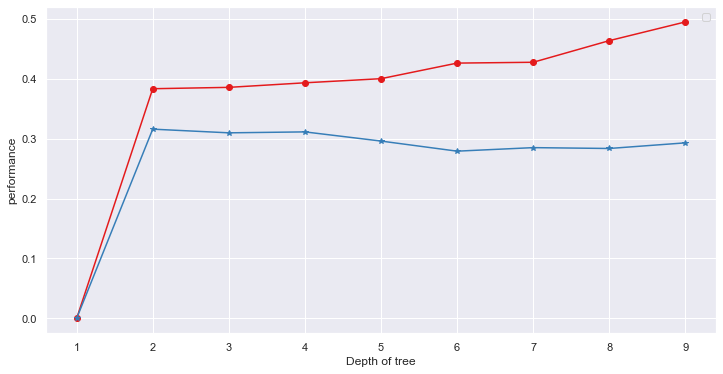

In [717]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
# plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.plot(frame['max_depth'], frame['f1_score'], marker='*')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [718]:
dt_model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=25, random_state=10)

In [719]:
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=25,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [722]:
x_pred = dt_model.predict(train_x)
f1_score(x_pred, train_y)

0.4

In [724]:
y_pred = dt_model.predict(test_x)
f1_score(y_pred, test_y)

0.29591836734693877

In [746]:
# train_accuracy = []
# validation_accuracy = []
# for depth in range(2,30):
#     dt_model = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=depth, random_state=10)
#     dt_model.fit(train_x, train_y)
#     train_accuracy.append(dt_model.score(train_x, train_y))
#     dt_model.predict(test_x)
#     validation_accuracy.append(dt_model.score(test_x, test_y))
    


train_accuracy = []
validation_accuracy = []
f1_scoring = []
for depth in range(2,30):
    dt_model = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    x_pred = dt_model.predict(train_x)
    train_accuracy.append(f1_score(x_pred, train_y))
#     print('train_length',len(train_accuracy))
    y_pred = dt_model.predict(test_x)
#     validation_accuracy.append(dt_model.score(test_x, test_y))
    f1_scoring.append(f1_score(y_pred,test_y))
#     print('test_lenth', len(f1_scoring),'\n')
    
# test_predict = logreg.predict(test_x)
# k_wf_wnm_new = f1_score(test_predict, test_y)
# print('Test f1_score    ', k_wf_wnm_new )

In [747]:
frame = pd.DataFrame({'max_depth':range(2,30), 'train_acc':train_accuracy, 'f1_score':f1_scoring})
frame

,max_depth,train_acc,f1_score
0,2,0.000000,0.000000
1,3,0.383244,0.315789
2,4,0.383244,0.315789
3,5,0.383244,0.315789
4,6,0.387556,0.315789
5,7,0.385520,0.309645
6,8,0.385520,0.309645
7,9,0.394265,0.305764
8,10,0.394570,0.303797
9,11,0.394570,0.303797


No handles with labels found to put in legend.


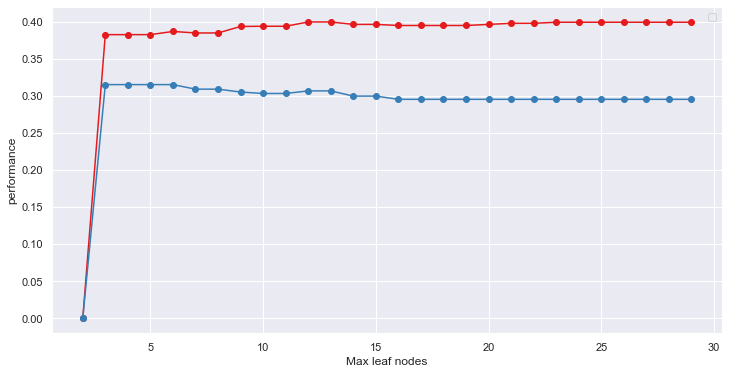

In [748]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['f1_score'], marker='o')
plt.xlabel('Max leaf nodes')
plt.ylabel('performance')
plt.legend()

at depth =4 and max leaf node =6 we are getting a better accuracy of 31%

No handles with labels found to put in legend.


   max_depth  train_acc  f1_score
0          2   0.387556  0.315789
1          3   0.387556  0.315789
2          4   0.381125  0.309645
3          5   0.381125  0.309645
4          6   0.381125  0.309645


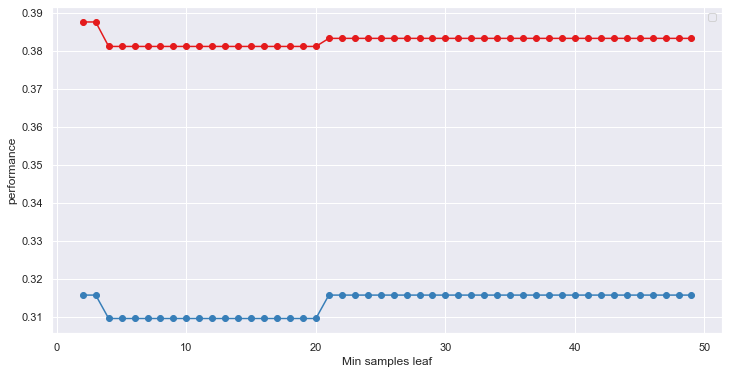

In [753]:

train_accuracy = []
validation_accuracy = []
f1_scoring = []
for depth in range(2,50):
    dt_model = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=6,min_samples_leaf=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    x_pred = dt_model.predict(train_x)
    train_accuracy.append(f1_score(x_pred, train_y))
#     print('train_length',len(train_accuracy))
    y_pred = dt_model.predict(test_x)
#     validation_accuracy.append(dt_model.score(test_x, test_y))
    f1_scoring.append(f1_score(y_pred,test_y))
#     print('test_lenth', len(f1_scoring),'\n')

frame = pd.DataFrame({'max_depth':range(2,50), 'train_acc':train_accuracy, 'f1_score':f1_scoring})
print(frame.head())


plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['f1_score'], marker='o')
plt.xlabel('Min samples leaf')
plt.ylabel('performance')
plt.legend()

decide the min samples

No handles with labels found to put in legend.


    max_depth  train_acc  f1_score
0           2   0.383244  0.315789
1           3   0.383244  0.315789
2           4   0.383244  0.315789
3           5   0.383244  0.315789
4           6   0.383244  0.315789
5           7   0.383244  0.315789
6           8   0.383244  0.315789
7           9   0.383244  0.315789
8          10   0.383244  0.315789
9          11   0.383244  0.315789
10         12   0.383244  0.315789
11         13   0.383244  0.315789
12         14   0.383244  0.315789
13         15   0.383244  0.315789
14         16   0.383244  0.315789
15         17   0.383244  0.315789
16         18   0.383244  0.315789
17         19   0.383244  0.315789
18         20   0.383244  0.315789
19         21   0.383244  0.315789
20         22   0.383244  0.315789
21         23   0.383244  0.315789
22         24   0.383244  0.315789
23         25   0.383244  0.315789
24         26   0.383244  0.315789
25         27   0.383244  0.315789
26         28   0.383244  0.315789
27         29   0.38

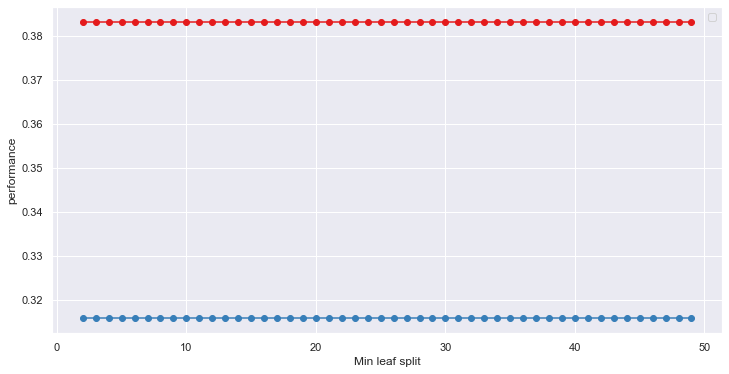

In [758]:

train_accuracy = []
validation_accuracy = []
f1_scoring = []
for depth in range(2,50):
    dt_model = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=6,min_samples_leaf=21,min_samples_split=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    x_pred = dt_model.predict(train_x)
    train_accuracy.append(f1_score(x_pred, train_y))
#     print('train_length',len(train_accuracy))
    y_pred = dt_model.predict(test_x)
#     validation_accuracy.append(dt_model.score(test_x, test_y))
    f1_scoring.append(f1_score(y_pred,test_y))
#     print('test_lenth', len(f1_scoring),'\n')

frame = pd.DataFrame({'max_depth':range(2,50), 'train_acc':train_accuracy, 'f1_score':f1_scoring})
print(frame)


plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['f1_score'], marker='o')
plt.xlabel('Min leaf split')
plt.ylabel('performance')
plt.legend()

In [759]:
from sklearn import tree

In [766]:
!pip install graphviz

In [767]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=train_x.columns,max_depth=2,filled=True)

In [778]:
!dot -Tpng tree.dot -o tree.png

In [779]:
%ls *png

 Volume in drive C has no label.
 Volume Serial Number is F225-5C75

 Directory of C:\Users\Del\Downloads

08/17/2020  01:42 AM            49,711 heatmap.png
11/25/2019  06:25 AM            26,267 Screenshot_2019-11-25 Google Colaboratory.png
01/07/2020  04:59 AM         1,092,335 Screen-Shot-2016-04-17-at-12.22.49-PM.png
01/14/2020  05:14 AM           108,998 thumbnail_image001.png
09/09/2020  01:04 PM            49,902 tree.png
               5 File(s)      1,327,213 bytes
               0 Dir(s)  94,883,012,608 bytes free


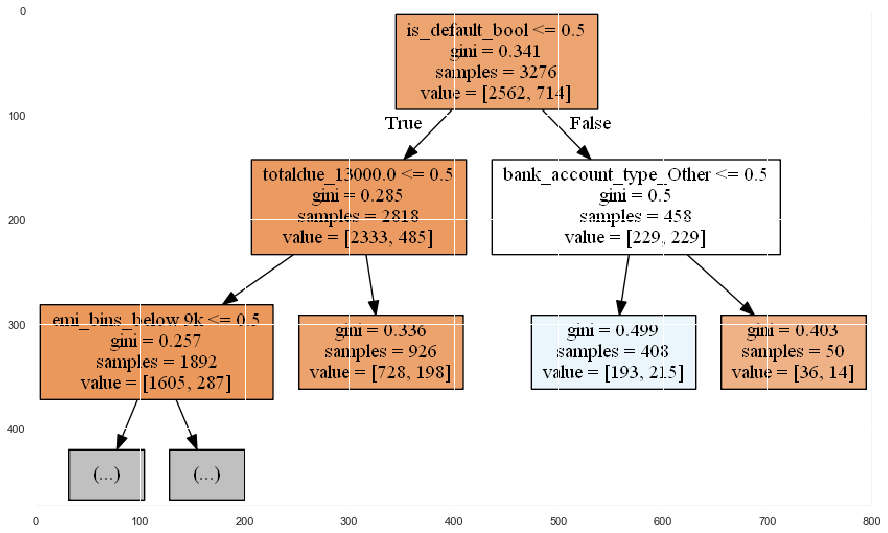

In [780]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

# Cross validation

In [801]:
x = final_df.drop('good_bad_flag',axis=1)
y = final_df['good_bad_flag']

x.shape, y.shape

((4368, 120), (4368,))

In [802]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 96, stratify=y)

In [803]:
## Importing the MinMax Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [804]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

In [805]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 4), X = train_x, y = train_y, cv = 3)
score

# try a 5 -fold CV or a 7-fold CV

array([0.77472527, 0.76648352, 0.77380952])

In [806]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(77.16727716727718, 0.3688353471793202)

In [807]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score(KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [808]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

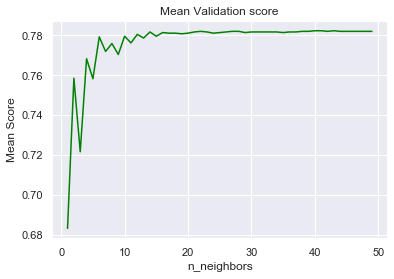

In [809]:
plt.plot(n_neighbors, mean, color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

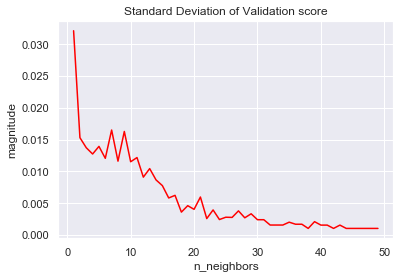

In [810]:
plt.plot(n_neighbors, std, color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

In [811]:
clf = KNN(n_neighbors = 14)
clf.fit(train_x, train_y)

score1 = clf.score(train_x, train_y)

score = clf.score(test_x, test_y)
score, score1

(0.7811355311355311, 0.7896825396825397)